# Final Excercise

In this notebook, you will find the last exercise of the lecture:
You are handed an initial dataset with several features and a univariate target. Next, you have to decide how to proceed. Since you do not have enough data to yet construct a classifier/predictor of any sensible evaluation metrics, the first task is, therefore, to acquire more data. For this purpose you can obtain batches of data according to your own design of experiments, so you will need to decide which experiments you consider necessary to perform. 

You will have four opportunities to acquire more data. Each time you have to decide which experiments to run and send those to Franz Götz-Hahn as a CSV file. The deadlines are 16.06.2023, 23.06.2023, 30.06.2023, and 07.07.2023 and 12:00 (noon). The format in all cases is a table with one row for each choosable feature, and the column entries corresponding to the desired values. Each individual sample will take approximately 30min, so pick a reasonable amount of experiments. For example, you will get the result for 100 experiments roughly 50 hours after the respective deadline. Should the experiment not be conductible, you will get a ``None`` as a result, e.g., if a feature value is out of range.

Once you have your data, you should compare the performance of different classifiers in predicting the targets. The classifiers to compare are [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You should utilize all the different parts of the E2ML lecture that you consider appropriate. This could include Data Preprocessing, Design of Experiments for the batches, deciding on Performance Measures, Statistical Significance Testing of a hypothesis, Design of Experiments for Hyperparameter Optimization.

Should you wish to present the results from this excercise in the oral examination, you need to hand in your entire package until 14.07.2023-23:59 as a GitHub Repository. Send the link to the (public) repository to Franz Götz-Hahn via [E-Mail](mailto:franz.goetz-hahn@uni-kassel.de). Please use the README of the repository to describe the structure of the package, include any required packages in the setup.py, add the data in the data subfolder, save any results in the results subfolder, and include a _descriptive_ jupyter notebook in the notebooks subfolder.

Do note, that the point of this excercise is **not** to achieve the best performance of your models, but rather to document your process and give the motivation behind your chosen approaches, _even the ones that failed_.

In [279]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from e2ml import utils

#### molluscs
Bestimmte/konkrete Muschelart.

### **Mollusc Classification** <a class="anchor" id="heart"></a>

Your dataset describes some physical measurements of a specific type of molluscs. Your goal is to predict the `Stage of Life` of the mollusc. The data you can get looks as follows:


| Sex	|Length	|Width	|Height|	Weight	|Non_Shell Weight	|Intestine Weight	|Shell Weight	|Stage of Life |
| ---                           | ----   | ----    | ----    | ----   |----             |----    |---- | ---------- |
| {Male (M), Female (F), Indeterminate (I)} | float (inches)     | float (inches)     |  float (inches)     | float (gram)      | float (gram)              | float (gram)     |  float (gram)     | {Child, Adolescent (Adole), Adult}      |

The table headings are identical to the column names in the corresponding CSV-files. 

We can send out divers that look for molluscs that fit your needs, which will subsequently be analyzed in a laboratory. You can request molluscs with all features except the Stage of Life attribute, as it is the target. The first day of diving has already been completed. After 8 hours of diving, they brought up the following molluscs:

In [280]:
initial_molluscs_data = pd.read_csv('../data/initial_molluscs_data.csv')
initial_molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult


## Exploration of initial dataset

In order to determine which samples to obtain next, one has to analyse what is already present.
Thus, the next step is to explore the initial dataset.
1. Methods used to explore each feature individually include box/violine plots, histograms, PDFs and CDFs.
2. Methods used to explore the relationship between feature include scatter plots and correlation matrices.

In [281]:
# store features, i.e. column names, in a list
features = initial_molluscs_data.columns
print(features)

Index(['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
       'Intestine Weight', 'Shell Weight', 'Stage of Life'],
      dtype='object')


In [282]:
initial_molluscs_data.describe()

,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.534375,0.421875,0.144062,0.877875,0.376344,0.187531,0.254938
std,0.124176,0.105560,0.041240,0.496578,0.224390,0.109644,0.135996
min,0.205000,0.155000,0.045000,0.042500,0.017000,0.005500,0.015500
25%,0.468750,0.371250,0.117500,0.508375,0.220625,0.097250,0.154875
50%,0.560000,0.442500,0.155000,0.915000,0.370500,0.201000,0.267500
75%,0.621250,0.487500,0.171250,1.163625,0.497125,0.268250,0.360000
max,0.680000,0.560000,0.195000,1.777500,0.861000,0.390500,0.455000


In [283]:
from sklearn import preprocessing

def encode_labels(data, existing_encoders=None):
    """
    :param data: data to be encoded
    :param existing_encoders: dictionary of encoders {column: encoder} or None if they should be created
    :return: data with encoded labels (categories to integers) and dictionary of encoders {column: encoder}
    """
    if existing_encoders is None:
        encoders = {}
        for column in data.columns:
            if data[column].dtype == type(object):
                le = preprocessing.LabelEncoder()
                le.fit(data[column])
                encoders[column] = le
                data[column] = le.transform(data[column])
        return data, encoders
    else:
        for column in data.columns:
            if data[column].dtype == type(object):
                le = existing_encoders[column]
                data[column] = le.transform(data[column])
        return data, existing_encoders


def decode_labels(data, encoders):
    """
    :param data: data to be decoded
    :param encoders: dictionary of encoders {column: encoder}
    :return: data with decoded labels (integers to categories)
    """
    for column in data.columns:
        if column in encoders.keys():
            le = encoders[column]
            data[column] = le.inverse_transform(data[column])

    return data

In [284]:
# create dataframe containing features transformed to numerical/categorical values
initial_molluscs_data_numerical, label_encoders = encode_labels(initial_molluscs_data.copy())
display(initial_molluscs_data_numerical)

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,0,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,1
1,0,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,0
2,2,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,1
3,1,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,0
4,2,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,1
5,2,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,2
6,1,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,1
7,0,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,2
8,0,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,1
9,0,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,1


In [285]:
# display data types of features
print('data types: ', initial_molluscs_data_numerical.dtypes)

data types:  Sex                   int32
Length              float64
Width               float64
Height              float64
Weight              float64
Non_Shell Weight    float64
Intestine Weight    float64
Shell Weight        float64
Stage of Life         int32
dtype: object


In [286]:
# catgegorical features translated
lable_encoder_stage_of_life = label_encoders['Stage of Life']
lable_encoder_sex = label_encoders['Sex']

cat_code_translation_life_stages = dict(zip(lable_encoder_stage_of_life.classes_, lable_encoder_stage_of_life.transform(lable_encoder_stage_of_life.classes_)))
cat_code_translation_sex = dict(zip(lable_encoder_sex.classes_, lable_encoder_sex.transform(lable_encoder_sex.classes_)))

print(cat_code_translation_life_stages)
print(cat_code_translation_sex)

TypeError: 'dict' object is not callable

In [ ]:
# target feature description
initial_molluscs_data_numerical['Stage of Life'].describe()

### (1) Exploration of single feature

1.1. Box and violin plots

In [ ]:
import matplotlib.pyplot as plt

def box_violin_plot(df, features= ['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
                                     'Intestine Weight', 'Shell Weight', 'Stage of Life'], box=True, violin=True):
    '''
    :param df: dataframe that contains information about the molluscs. Column names are features.
    :param features: list of features to be plotted.
    :param box: whether a box plot should be plotted.
    :param violin: whether a violin plot should be plotted.
    :return: -
    creates a plots containing several box and violin plots of the features as subplots.
    '''
    rows = 3 if len(df.columns) == 9 else 4
    if box:
        plt.figure(figsize=(26, 16))
        for num_feat in range(len(df.columns)):
            feat = features[num_feat]
            ax = plt.subplot(rows, len(df.columns)//3, num_feat + 1)
            data = df[feat]
            ax.set_title(f'Box plot of {feat}')
            box = plt.boxplot(data)
            if feat == 'Sex':
                ax.legend([box['boxes'][0]], [cat_code_translation_sex])
            elif feat == 'Stage of Life':
                ax.legend([box['boxes'][0]], [cat_code_translation_life_stages])
        plt.show()

    if violin:
        plt.figure(figsize=(26, 16))
        for num_feat in range(len(df.columns)):
            feat = features[num_feat]
            ax = plt.subplot(rows, len(df.columns)//3, num_feat + 1)
            data = df[feat]
            ax.set_title(f'Violin plot of {feat}')
            violin = plt.violinplot(data)
            if feat == 'Sex':
                ax.legend([violin['bodies'][0]], [cat_code_translation_sex])
            elif feat == 'Stage of Life':
                ax.legend([violin['bodies'][0]], [cat_code_translation_life_stages])
        plt.show()

In [ ]:
# box_violin_plot(initial_molluscs_data_numerical)

Box Plot:
The majority of the initial dataset are female shells.
The box plot of the target features Length and Width has the same shape.
The box plot of the target features Weight and Non_shell weight has the same shape.

Violin Plot:
Length, Width and Height a skewed (have most entries at the top of their value range).
The rest of the features have most entries around the mean of their value space.

1.2. Histograms

In [ ]:
from matplotlib.pyplot import cm

def hist_plot(df, features= ['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
                                   'Intestine Weight', 'Shell Weight', 'Stage of Life']):
    '''
    :param df: dataframe that contains information about the molluscs. Column names are features.
    :param features: list of features to be plotted.
    :return: -
    creates a plot containing several histograms of the features as subplots.
    '''
    rows = 3 if len(df.columns) == 9 else 4
    plt.figure(figsize=(26, 16))
    if len(df.columns) != 9:
        plt.subplots_adjust(hspace=0.5)
    for num_feat in range(len(df.columns)):
        feat = features[num_feat]
        ax = plt.subplot(rows, len(df.columns)//3, num_feat + 1)
        data = df[feat]
        ax.set_title(f'Histogram of {feat}')
        N, bins, patches = plt.hist(data)
        color = cm.rainbow(np.linspace(0, 1, len(patches)))
        #plt.bar_label([str(key) + ': ' + str(value) for key, value in cat_code_translation_life_stages.items()], fontsize=20)
        for i in range(0,len(patches)):
            patches[i].set_facecolor(color[i])
        ax.set_xlabel(feat)
        ax.set_ylabel('count')
        if feat == 'Sex':
            ax.set_xlabel(cat_code_translation_sex)
        elif feat == 'Stage of Life':
            ax.set_xlabel(cat_code_translation_life_stages)
    plt.show()

In [ ]:
#hist_plot(initial_molluscs_data_numerical)

results

1.3. PDFs and CDFs

In [287]:
from scipy.stats import norm
def plot_PDF_CDF(data, dataset_name='initial', pdf=True, cdf=True, features= ['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
                                                  'Intestine Weight', 'Shell Weight', 'Stage of Life']):
    '''
    :param data: data to be plotted.
    :param dataset_name: name of the dataset.
    :param  pdf: whether a PDF should be plotted.
    :param  cdf: whether a CDF should be plotted.
    :param features: list of features to be plotted.
    :return: -
    creates plots of the PDF and CDF of the data for every feature.
    '''
    if pdf:
        plt.figure(figsize=(9, 6))
        for feat in data.columns:
            pdf = norm.pdf(np.sort(data[feat]), data[feat].mean(), data[feat].std())
            plt.plot(np.sort(data[feat]), pdf, label=feat)
        plt.xlabel('feature value')
        plt.ylabel('probability')
        plt.legend()
        plt.title(f'PDF of {dataset_name} dataset')
        plt.show()
    if cdf:
        plt.figure(figsize=(9, 6))
        for feat in data.columns:
            cdf = norm.cdf(np.sort(data[feat]), data[feat].mean(), data[feat].std())
            plt.plot(np.sort(data[feat]), cdf, label=feat)
        plt.xlabel('feature value')
        plt.ylabel('probability')
        plt.legend()
        plt.title(f'CDF of {dataset_name} dataset')
        plt.show()

In [288]:
#plot_PDF_CDF(initial_molluscs_data_numerical)

results

2.1. Scatter plots

In [289]:
import seaborn as sns

def scatter_features(df, dataset_name='initial', features= ['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
                                                                                'Intestine Weight', 'Shell Weight', 'Stage of Life']):
    '''
    :param data: data to be plotted.
    :param dataset_name: name of the dataset.
    :param features: list of features to be plotted.
    :return: -
    creates scatter plots of the data for every feature, colors different stages of life.
    '''
    if 'Stage of Life' not in df.columns:
        return
    rows = 3 if len(df.columns) == 9 else 4
    plt.figure(figsize=(19, 16))
    for num_feat in range(len(features)):
        feat = features[num_feat]
        ax = plt.subplot(rows, len(features)//3, num_feat + 1)
        data = df[feat]
        ax.scatter(data, np.zeros_like(data), c=df['Stage of Life'], cmap='viridis', label=df['Stage of Life'])
        ax.set_title(f'Scatter plot of {feat} in {dataset_name} dataset')
        # TODO gerneate legend containing color
        if feat == 'Sex':
            ax.set_xlabel(cat_code_translation_sex)
        elif feat == 'Stage of Life':
            ax.set_xlabel(cat_code_translation_life_stages)
    plt.show()

def kernel_density_features(df, dataset_name='initial', features= ['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight',
                                                            'Intestine Weight', 'Shell Weight', 'Stage of Life']):
    '''
    :param data: data to be plotted.
    :param dataset_name: name of the dataset.
    :param features: list of features to be plotted.
    :return: -
    creates kernel density plots of the data for every feature, colors different stages of life.
    '''
    if 'Stage of Life' not in df.columns:
        return
    rows = 3 if len(df.columns) == 9 else 4
    plt.figure(figsize=(19, 16))
    for num_feat in range(len(features)):
        feat = features[num_feat]
        ax = plt.subplot(rows, len(features)//3, num_feat + 1)
        sns.kdeplot(data=df, x=feat, hue='Stage of Life')
        ax.set_title(f'KDE plot of {feat} in {dataset_name} dataset')
        if feat == 'Sex':
            ax.set_ylabel(cat_code_translation_sex)
        elif feat == 'Stage of Life':
            ax.set_ylabel(cat_code_translation_life_stages)
    plt.show()

In [290]:
#scatter_features(initial_molluscs_data_numerical)
#kernel_density_features(initial_molluscs_data_numerical)

2.2. Correlation matrices

<Axes: >

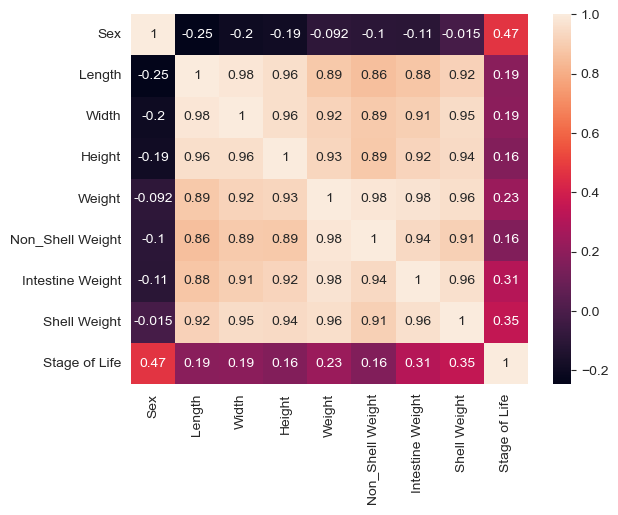

In [291]:
import seaborn as sns
sns.heatmap(initial_molluscs_data_numerical.corr(), annot=True)

results
strong correlation between most features except Sex and Stage of Life to other features.

## Data preprocessing
Individually apply StandardScaler to numerical features.

In [292]:
from sklearn.preprocessing import StandardScaler

def scale_df(data, existing_scalers=None):
    scaled_numerical_df = data.copy()
    if existing_scalers is not None:
        for feat in features:
            scaled_numerical_df[feat] = existing_scalers[feat].transform(scaled_numerical_df[[feat]].values.reshape(-1, 1))
        return scaled_numerical_df, existing_scalers
    else:
        scalers = {}
        for feat in features:
            # store scaler in a variable to be able to inverse transform the data
            scalers[feat] = StandardScaler()
            scaled_numerical_df[feat] = scalers[feat].fit_transform(scaled_numerical_df[[feat]].values.reshape(-1, 1))
        return scaled_numerical_df, scalers


def reverse_scale_df(scaled_data, feat, scalers):
    # revert scaling
    # use stored scaler to inverse transform the data
    return scalers[feat].inverse_transform(scaled_data[[feat]].values.reshape(-1, 1))


scaled_numerical_df, scalers = scale_df(initial_molluscs_data_numerical)

inverted_scaled_numerical_df = scaled_numerical_df.copy()
for feat in features:
    inverted_scaled_numerical_df[feat] = reverse_scale_df(inverted_scaled_numerical_df, feat, scalers)


inverted_scaled_numerical_df = inverted_scaled_numerical_df.astype({'Sex':'int64', 'Stage of Life':'int64'}, copy=True)
display(initial_molluscs_data_numerical.compare(inverted_scaled_numerical_df))

#display(inverted_scaled_numerical_df)
print('identical to prescaled dataframe: ', not initial_molluscs_data_numerical.compare(inverted_scaled_numerical_df).notnull().values.any(), '\nworks! cf. above')

Length         Width         Weight         Non_Shell Weight          \
     self  other   self  other    self   other             self   other   
3     NaN    NaN    NaN    NaN     NaN     NaN              NaN     NaN   
4   0.205  0.205  0.155  0.155  0.0425  0.0425           0.0170  0.0170   
11    NaN    NaN    NaN    NaN  0.2280  0.2280           0.1025  0.1025   

   Intestine Weight         Shell Weight          
               self   other         self   other  
3               NaN     NaN       0.1075  0.1075  
4            0.0055  0.0055       0.0155  0.0155  
11           0.0420  0.0420          NaN     NaN

identical to prescaled dataframe:  False 
works! cf. above


## creation of supplementary dataset request

### Data set size
An individual sample will take approximately 30min to be generated.
The E-Mail will be sent on Friday, possibly Thursday night.
However, for simplicity reason I calculate with Friday 12 o'clock.

I am most likely busy on Thursday, 22.06.2023.
Therefore, I have to work on the new samples on Wednesday (21.06.2023) or Thursday night (22.06.2023).
Thus, I have either 5 or 6 days to generate the new samples.

2 samples per hour can be generated.
A day has 24 hours.
Thus, 48 samples can be generated per day.

5 days * 48 samples = 240 samples
6 days * 48 samples = 288 samples   -> 22.06.2023 12 o'clock

Since I will not be available on Thursday until afternoon, I can request more samples.
The data should arrive on Thursday afternoon at 14-15 o'clock. -> + 3h == 6 samples

-> Total data to generate = 294 samples


### Data set generation
One may scale the features before generating the new samples and inverse them afterwards OR use the non-scaled version to generate new data points.

The dataset has to be generated by some process.
1. Normal distribution
2. Latin cube sampling
3. Halton sequence


### Data set purpose
One cam either request data to explore or exploit the feature space.
It is possible to assign different portions to different purposes.
For example, 50% of the data is used to explore the feature space and 50% to exploit it.

Since the initial data set is relatively small, I would suggest to use 50% of the data to explore the feature space.
The other 50% can be used to exploit the feature space.


### Data set: Plausibility check
After generating the new data set, it has to be checked whether the data is plausible.
Certain points to check are listed below.



3.1 The first approach that comes to mind is a normal uni-variate distribution.

In [293]:
data_set_size = 294

In [294]:
# convert generated datato plausible values
def post_process_generated_data(df, upper_bound=0.7):
    # change feature values within the range they occur in the initial dataset
    while df[df < 0].count().values.any():
        df[df <= 0] += uniform(0.01, upper_bound)
    df = df.astype({'Sex':'int64', 'Stage of Life':'int64'}, copy=True)
    df.drop('Stage of Life', axis=1, inplace=True)
    return df

In [295]:
from random import uniform

new_normal_df = pd.DataFrame(columns=features)

for feat in features:
    new_normal_df[feat] = np.random.normal(initial_molluscs_data_numerical[feat].mean(), initial_molluscs_data_numerical[feat].std(), data_set_size)

# change feature values within the range they occur in the initial dataset
new_normal_df = post_process_generated_data(new_normal_df)
display(new_normal_df)

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,0,0.425427,0.394315,0.175385,1.348897,0.083427,0.316617,0.360336
1,0,0.377980,0.503104,0.124293,0.232937,0.573826,0.226586,0.116136
2,0,0.611771,0.496607,0.193888,0.578043,0.248020,0.203113,0.534382
3,0,0.671353,0.443649,0.091971,1.090810,0.315316,0.126808,0.200425
4,0,0.516252,0.420772,0.230092,1.818647,0.298051,0.114754,0.179814
...,...,...,...,...,...,...,...,...
289,1,0.688954,0.521319,0.102468,1.200261,0.742646,0.118705,0.123603
290,0,0.324683,0.465338,0.203591,0.936586,0.514986,0.282885,0.114197
291,1,0.494729,0.436040,0.156186,0.384994,0.727701,0.175975,0.226270
292,0,0.481267,0.276498,0.089323,1.102687,0.497225,0.232424,0.215825


3.2. Latin Cube

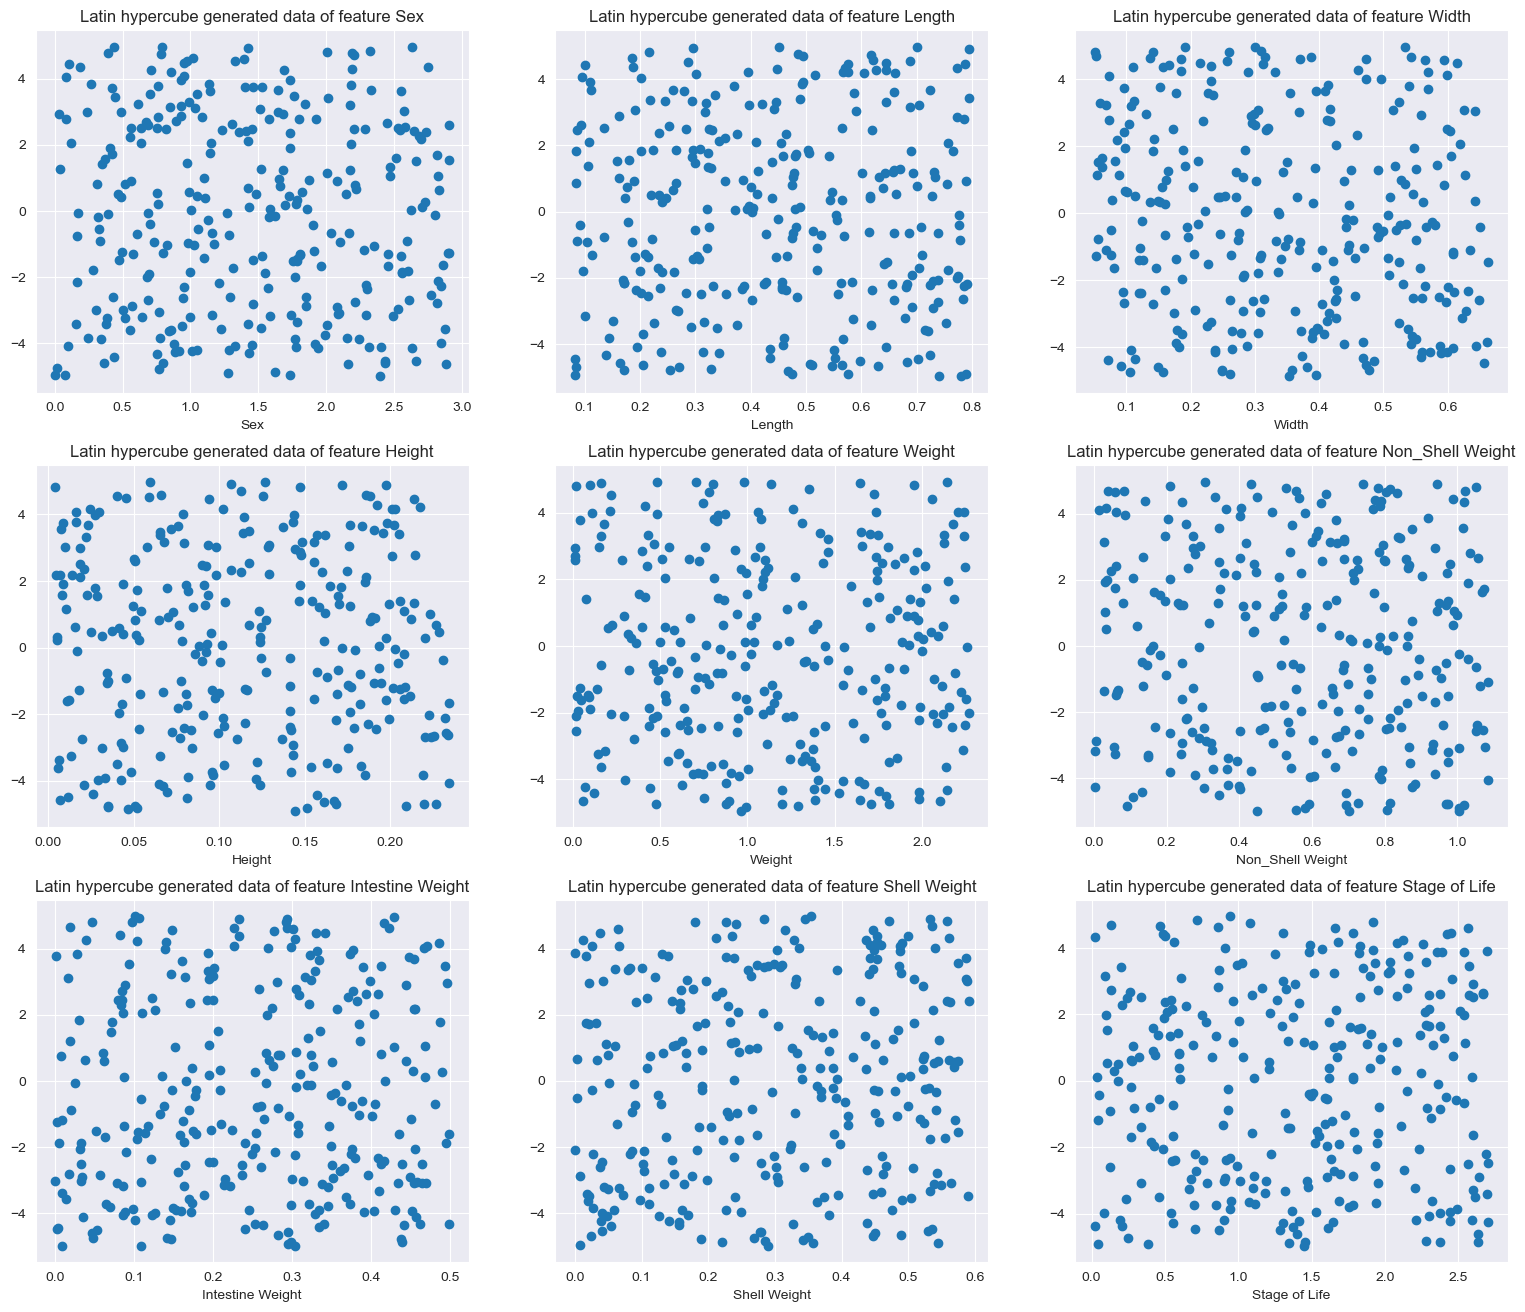

In [296]:
from e2ml.experimentation import lat_hyp_cube

def generate_latin_hyp_cube_feature(data, feat, size=data_set_size):
    '''
    :param data: original dataframe to calculate range of feature to generate for.
    :param feat: feature to generate for
    :param size: number of samples to generate
    :return: two dimensional generated data. To get the first dimension, use X_lat[:, 0].
    '''
    # exploit feature space using one sigma deviation
    std = data[feat].std()
    x_min = max(min(data[feat]) - std, 0)    # features should not be negative or zero for plausibility reasons
    x_max = max(data[feat]) + std
    bounds = [[x_min, x_max], [-5, 5]]
    X_lat = lat_hyp_cube(size, 2, bounds)
    return X_lat


new_latin_df = pd.DataFrame(columns=features)

# Generate data_set_size two-dimensional conditions `X` with the Latin hypercube
# in the hypercube [x_min, x_max] x [1, 5].
plt.figure(figsize=(19, 16))
for num_feat in range(len(features)):
    feat = features[num_feat]
    ax = plt.subplot(3,len(features)//3, num_feat + 1)
    X_lat = generate_latin_hyp_cube_feature(initial_molluscs_data_numerical, feat)
    new_latin_df[feat] = X_lat[:, 0]

    # Plot generated conditions.
    ax.scatter(new_latin_df[feat], X_lat[:, 1])
    ax.set_title('Latin hypercube generated data of feature ' + feat)
    ax.set_xlabel(feat)
plt.show()

new_latin_df = post_process_generated_data(new_latin_df)
#display(new_latin_df)

3.3. Halton Sequence

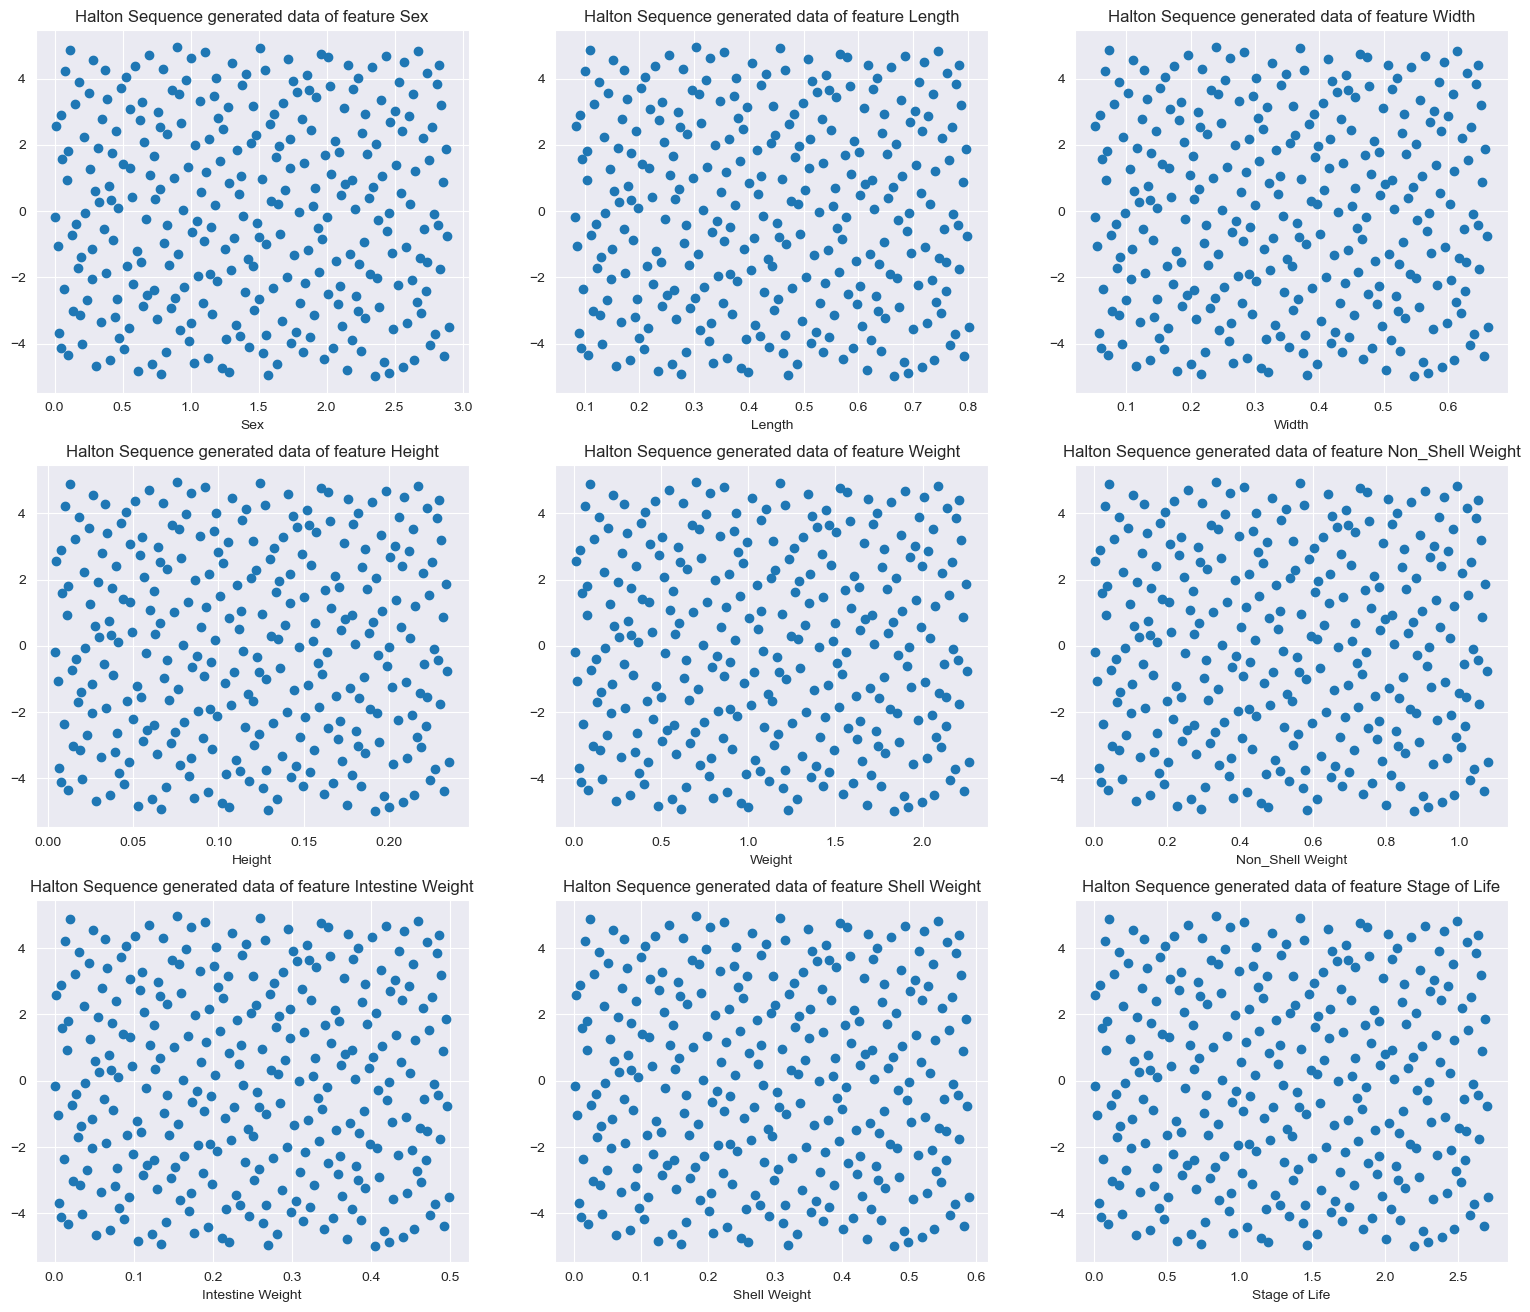

In [297]:
from e2ml.experimentation import halton

def generate_halton_sq_feature(data, feat, size=data_set_size):
    '''
    :param data: original dataframe to calculate range of feature to generate for.
    :param feat: feature to generate for
    :param size: number of samples to generate
    :return: two dimensional generated data. To get the first dimension, use X_halton[:, 0].
    '''
    # exploit feature space using one sigma deviation
    std = data[feat].std()
    x_min = max(min(data[feat]) - std, 0)    # features should not be negative or zero for plausibility reasons
    x_max = max(data[feat]) + std
    bounds = [[x_min, x_max], [-5, 5]]
    X_halton = halton(size, 2, bounds)
    return X_halton

new_halton_df = pd.DataFrame(columns=features)

plt.figure(figsize=(19, 16))
for num_feat in range(len(features)):
    feat = features[num_feat]
    ax = plt.subplot(3,len(features)//3, num_feat + 1)
    X_halton = generate_halton_sq_feature(initial_molluscs_data_numerical, feat)
    new_halton_df[feat] = X_halton[:, 0]

    # Plot generated conditions.
    ax.scatter(new_halton_df[feat], X_halton[:, 1])
    ax.set_title('Halton Sequence generated data of feature ' + feat)
    ax.set_xlabel(feat)
plt.show()

new_halton_df = post_process_generated_data(new_halton_df)
#display(new_halton_df)

TODO: what kind of experiment? controlled etc.

## Check for consistency in generated data

There are some relations between features which should be true if the ground truth data set is biological plausible.
These relations should also be true for the generated data set.

1. The sum of the weights (Non Shell, Shell and Intestine) should be $\le$ to the weight of the whole mollusc. On average, the sum is 0.05 smaller than the weight of the whole mollusc. The sum is never greater than the weight of the whole mollusc.
2. The length of the mollusc should be $\ge$ to the width of the mollusc. On average, the length is 0.1 greater than the width. The length is never smaller than the width.
3. There is a small relation between the length and the width + height of the mollusc. On average, there is a 0.03 difference.

Using points 1. and 2. one can check the consistency of the generated data set.

In [298]:
# weight relations
weight_df = pd.DataFrame({'Weight': initial_molluscs_data_numerical['Weight'], 'Non_Shell Weight': initial_molluscs_data_numerical['Non_Shell Weight'], 'Shell Weight': initial_molluscs_data_numerical['Shell Weight'], 'Intestine Weight': initial_molluscs_data_numerical['Intestine Weight'], 'summed_weight': (initial_molluscs_data['Non_Shell Weight'] + initial_molluscs_data['Shell Weight'] + initial_molluscs_data['Intestine Weight'])})
weight_df['diff_sum_total'] = weight_df['Weight'] - weight_df['summed_weight']
display(weight_df[['Weight', 'summed_weight', 'diff_sum_total']])
weight_df['diff_sum_total'].describe()

,Weight,summed_weight,diff_sum_total
0,0.4165,0.3955,0.0210
1,0.5700,0.4720,0.0980
2,1.0225,1.0195,0.0030
3,0.4405,0.4205,0.0200
4,0.0425,0.0380,0.0045
5,1.3445,1.1965,0.1480
6,0.5310,0.5010,0.0300
7,1.1115,1.0770,0.0345
8,1.6275,1.5115,0.1160
9,1.0430,1.0145,0.0285


count    16.000000
mean      0.059062
std       0.051965
min       0.003000
25%       0.020750
50%       0.044500
75%       0.077750
max       0.179500
Name: diff_sum_total, dtype: float64

In [299]:
len_width_df = pd.DataFrame({'Length': initial_molluscs_data_numerical['Length'], 'Width': initial_molluscs_data_numerical['Width'], 'diff_len_width': (initial_molluscs_data['Length'] - initial_molluscs_data['Width']), 'Height': initial_molluscs_data_numerical['Height'], 'diff_len_from_width_height': (initial_molluscs_data['Length'] - initial_molluscs_data_numerical['Width'] - initial_molluscs_data['Height'])})
# length-width relations
display(len_width_df[['Length', 'Width', 'diff_len_width']])
print(len_width_df['diff_len_width'].describe())

# length-width-height relations
display(len_width_df[['Length', 'Width', 'Height', 'diff_len_from_width_height']])
len_width_df['diff_len_from_width_height'].describe()

,Length,Width,diff_len_width
0,0.450,0.345,0.105
1,0.475,0.380,0.095
2,0.610,0.485,0.125
3,0.430,0.340,0.090
4,0.205,0.155,0.050
5,0.600,0.475,0.125
6,0.515,0.390,0.125
7,0.625,0.495,0.130
8,0.650,0.520,0.130
9,0.620,0.480,0.140


count    16.000000
mean      0.112500
std       0.027447
min       0.050000
25%       0.093750
50%       0.117500
75%       0.126250
max       0.170000
Name: diff_len_width, dtype: float64


,Length,Width,Height,diff_len_from_width_height
0,0.450,0.345,0.120,-0.015
1,0.475,0.380,0.145,-0.050
2,0.610,0.485,0.170,-0.045
3,0.430,0.340,0.105,-0.015
4,0.205,0.155,0.045,0.005
5,0.600,0.475,0.175,-0.050
6,0.515,0.390,0.110,0.015
7,0.625,0.495,0.160,-0.030
8,0.650,0.520,0.195,-0.065
9,0.620,0.480,0.165,-0.025


count    16.000000
mean     -0.031563
std       0.031871
min      -0.075000
25%      -0.053750
50%      -0.037500
75%      -0.010000
max       0.015000
Name: diff_len_from_width_height, dtype: float64

## Generate & save generated data to request

In [300]:
def check_consistency(request_df, weight=True):
    # check consistency of generated data
    # (1)  sum(special weights) <= weight
    if weight:
        while request_df[(request_df['Non_Shell Weight'] + request_df['Shell Weight'] + request_df['Intestine Weight'] - request_df['Weight']) > 0].count().values.any():
            request_df.loc[(request_df['Non_Shell Weight'] + request_df['Shell Weight'] + request_df['Intestine Weight'] - request_df['Weight']) > 0, 'Weight'] += uniform(0.01, 0.05)  # TODO adds same value for all entries

    # (2) length >= width
    while request_df[(request_df['Length'] - request_df['Width']) < 0].count().values.any():
        request_df.loc[(request_df['Length'] - request_df['Width']) < 0, 'Width'] -= uniform(0.01, 0.1) # TODO subtracts same value for all entries

    return request_df

In [301]:
def generate_data(initial_data, data_set_size=294, explore_portion=0.5):
    # generate data set
    print('The data set size is: ', data_set_size)

    # portion of data
    total_exploration_size = int(data_set_size * explore_portion) # explore rare conditions
    print('The exploration data set size is: ', total_exploration_size)
    print('The exploitation data set size is: ', data_set_size - total_exploration_size)    # exploit common conditions

    # prepare data set
    scaled_numerical_df, scalers = scale_df(initial_data)

    # generate normal data set first
    request_df = pd.DataFrame(columns=features)
    for feat in features:
        # first half halton, second half latin hypercube
        tmp = pd.Series(generate_halton_sq_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0])
        tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), ignore_index = True)
        request_df[feat] = tmp

    # exploration for one cell at the time in according portion of data (rare conditions)
    # Sex is not interesting with regard to exploration
    exploration_features = ['Length', 'Width', 'Height', 'Non_Shell Weight', 'Shell Weight', 'Intestine Weight']
    # explore feature space of one feature at the time
    num_per_feature = total_exploration_size/len(exploration_features)  # how often should each feature be explored = size of exploration data set to generate
    indices_to_explore = list(range(0, total_exploration_size, 2))  # indices of data points to explore
    for feat in exploration_features:
        # generate exploration data set
        exploration_values = np.append(np.random.normal(scaled_numerical_df[feat].min(), scaled_numerical_df[feat].std(), int(num_per_feature/2)), np.random.normal(scaled_numerical_df[feat].max(), scaled_numerical_df[feat].std(), int(num_per_feature/2)))
        for id in range(len(indices_to_explore)):
            request_df[feat][indices_to_explore[id]] = exploration_values[id%len(exploration_values)]
    return request_df

In [302]:
request_df = generate_data(initial_molluscs_data_numerical, explore_portion=0.5)

# DO NOT reverse scaling, bc i did not scale input data
for feat in features:
    request_df[feat] = reverse_scale_df(request_df, feat, scalers)

# check consistency of generated data
request_df = check_consistency(request_df)

# valid encoded datatypes
request_df = post_process_generated_data(request_df)

# decode categorical data
request_df['Sex'] = lable_encoder_sex.inverse_transform(request_df['Sex'])

display(request_df)
#request_df.to_csv('../data/generated_data_week1.csv', index=False)

The data set size is:  294
The exploration data set size is:  147
The exploitation data set size is:  147


C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2577833034.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), ignore_index = True)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2577833034.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), ignore_index = True)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2577833034.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), igno

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,I,0.223354,0.192451,0.103908,1.575976,0.204059,0.037213,0.043545
1,I,0.601825,0.482796,0.167107,1.226926,0.553605,0.265684,0.338952
2,M,0.452060,0.139447,0.081538,1.925027,0.388296,0.300950,0.143765
3,I,0.568100,0.452336,0.155585,1.052400,0.464975,0.226608,0.296945
4,M,0.305295,0.026707,0.061139,1.750502,0.235687,0.150994,0.047912
...,...,...,...,...,...,...,...,...
289,F,0.679490,0.465851,0.210705,1.860861,1.045754,0.403418,0.406593
290,M,0.616827,0.439679,0.228737,1.289279,0.520193,0.451983,0.290945
291,M,0.700330,0.584991,0.161024,2.042759,0.551894,0.323484,0.324883
292,I,0.764791,0.459784,0.148094,2.154677,0.980724,0.357360,0.354582


In [303]:
# plot PDF of generated data
request_df = encode_labels(request_df, existing_encoders=label_encoders)[0]
#plot_PDF_CDF(request_df, dataset_name='generated_data_week1', cdf=False)

# Analyse response to generated dataset (Week 1 dataset response)

In [304]:
requested_molluscs_data_week1 = pd.read_csv('../data/batch1_gutekunst_labels.csv')
requested_molluscs_data_week1

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,I,0.163464,0.177184,0.024135,1.575976,0.187435,0.094655,0.145628,Adult
1,I,0.601825,0.482796,0.167107,1.226926,0.553605,0.265684,0.338952,Adult
2,M,0.194742,0.182361,0.024102,1.925027,0.072065,0.154005,0.144956,Adult
3,I,0.568100,0.452336,0.155585,1.052400,0.464975,0.226608,0.296945,Adult
4,M,0.092768,0.017081,0.079255,1.750502,0.154308,0.156663,0.196754,Adult
...,...,...,...,...,...,...,...,...,...
289,I,0.768997,0.449339,0.193502,1.887989,0.955029,0.529385,0.400707,Child
290,F,0.675235,0.433018,0.177450,1.649433,0.970656,0.256570,0.390683,Adole
291,M,0.163464,0.177184,0.024135,0.954167,0.187435,0.094655,0.145628,Adole
292,I,0.697846,0.557655,0.182784,1.754808,0.986252,0.476395,0.264917,Child


In [305]:
# prepare data set (encoder)
requested_molluscs_data_week1 = encode_labels(requested_molluscs_data_week1, existing_encoders=label_encoders)[0]
#requested_molluscs_data_week1 = scale_df(requested_molluscs_data_week1, existing_scalers=scalers)[0]
#requested_molluscs_data_week1

In [306]:
def run_all_visualizations(df, dataset_name):
    try:
        box_violin_plot(df)
        hist_plot(df)
        #plot_PDF_CDF(df, dataset_name=dataset_name)
        #scatter_features(df, dataset_name=dataset_name)
        kernel_density_features(df, dataset_name=dataset_name)

    except ValueError:
        print('dataframe is empty')

In [307]:
# create several plots to compare the initial data with the requested data
#run_all_visualizations(requested_molluscs_data_week1, dataset_name='week1')

<Axes: >

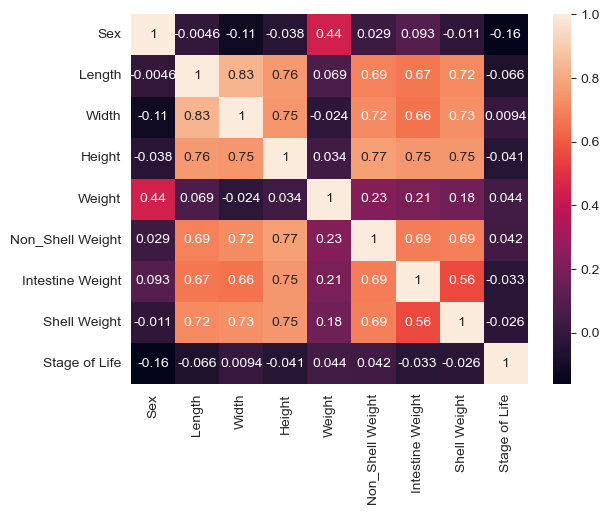

In [308]:
sns.heatmap(requested_molluscs_data_week1.corr(), annot=True)

### informaton about generated data (week 1)
- few entries/ samples have length and width around 0.3 - 0.4.
- weight is less than 0.7 most of the time. (?)
- few female samples
- most of the target values (Stage of Life) are 1 (adult)
- most females (0) are adults (1)
- most children are i (1)
- most adoles are male (2)
- length, height and width are correlated/have similar KDE plots

#### results of correlation heatmap:
strong correlation between most features except Sex, weight and Stage of Life to other features.
Overall less correlation between features than in the initial data set.
Correlation between weight and sex is stronger than in the initial data set.
Stage of Life has negative small correlation to most features.


In [309]:
# NaN values
df_week1_nan = requested_molluscs_data_week1[requested_molluscs_data_week1['Stage of Life'].isna()]
df_week1_nan
nans_exist = df_week1_nan.count().values.any()

In [310]:
if nans_exist:
    run_all_visualizations(df_week1_nan, dataset_name='week1_nan')

In [311]:
# save NaN value combinations to csv
df_week1_nan.to_csv('../data/generated_nan.csv', index=False)

# append data frame to CSV file
# df.to_csv('../data/generated_nan.csv', mode='a', index=False, header=False)


In [312]:
# store all generated data so far in a variable
total_data_incl_target = requested_molluscs_data_week1.append(initial_molluscs_data_numerical)

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\770880142.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data_incl_target = requested_molluscs_data_week1.append(initial_molluscs_data_numerical)


### generation of new data
- many females
- many small and big feature values -> esploration of feature space
- same data set size as in week 1

In [313]:
# all generated data so far
total_data = request_df.append(initial_molluscs_data_numerical.drop('Stage of Life', axis=1, inplace=False))

# calculate the number of molluscs to generate
print('Dataset size: ', data_set_size, ' and days necessary to generate: ', (data_set_size*30)/(24*2*30))

# generate next week's data (may contain negative feature values)
request_df_w2 = pd.DataFrame(columns=features)
request_df_w2 = generate_data(total_data_incl_target, data_set_size=data_set_size, explore_portion=0.6)

# first 20 entries: extreme exploration values
display(request_df_w2.head(20))
# first 10 entries: extreme small exploration values
# second 10 entries: extreme big exploration values
for feat in total_data.columns:
    min_feat = min(total_data[feat])
    max_feat = max(total_data[feat])
    request_df_w2[feat][0:10] = np.random.uniform(min_feat, 2, 10)
    request_df_w2[feat][10:20] = np.random.uniform(max_feat, 2, 10)

display(request_df_w2.head(20))

Dataset size:  294  and days necessary to generate:  6.125
The data set size is:  294
The exploration data set size is:  176
The exploitation data set size is:  118


C:\Users\klara\AppData\Local\Temp\ipykernel_7572\1102393729.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = request_df.append(initial_molluscs_data_numerical.drop('Stage of Life', axis=1, inplace=False))
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2577833034.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), ignore_index = True)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2577833034.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series(generate_latin_hyp_cube_feature(scaled_numerical_df, feat, int(data_set_size/2))[:,0]), ignore_index = True)
C:\Users\kla

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,1.034913,-3.404523,-2.622742,-1.985351,1.310804,-0.416108,-2.171195,-1.792206,1.457924
1,0.517456,0.670569,0.670311,0.775091,0.655402,0.720829,0.837178,0.948656,0.728962
2,1.552369,-2.613140,-4.289003,-2.483013,1.966205,-1.442469,-2.025275,-2.251088,2.186886
3,0.258728,0.335285,0.335156,0.387546,0.327701,0.360415,0.418589,0.474328,0.364481
4,1.293641,-2.271958,-2.960509,-1.605325,1.638504,-3.104654,-1.411369,-1.560326,1.822405
5,0.776185,1.005854,1.005467,1.162637,0.983103,1.081244,1.255767,1.422984,1.093443
6,1.811098,-0.838672,-2.115217,-1.473089,2.293906,-2.515333,-3.257071,-3.207977,2.551367
7,0.129364,0.167642,0.167578,0.193773,0.163850,0.180207,0.209295,0.237164,0.182241
8,1.164277,-2.918699,-2.813777,-1.603516,1.474654,-2.244488,-0.724680,-2.099275,1.640165
9,0.646821,0.838211,0.837889,0.968864,0.819252,0.901036,1.046473,1.185820,0.911203


,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,1.030268,0.663564,0.494412,0.152790,0.176047,1.736295,1.714559,0.581745,1.457924
1,0.938331,1.209724,0.091468,1.333300,0.444288,1.064251,0.413822,1.161621,0.728962
2,0.225927,1.930758,0.546228,1.602890,0.178432,1.017466,0.939326,0.097775,2.186886
3,0.140502,1.465984,1.216890,1.436662,0.701922,1.550985,1.981242,1.116826,0.364481
4,0.424763,1.499407,0.474408,0.046309,0.792172,0.743169,0.710948,0.842384,1.822405
5,1.957199,0.339619,1.594891,1.228522,1.889913,0.540288,1.754303,1.847257,1.093443
6,0.504086,0.834962,0.088126,1.843740,0.623363,1.173438,1.083118,0.141108,2.551367
7,0.562186,1.266307,1.801888,1.715826,0.386871,0.976399,0.139950,0.760213,0.182241
8,1.212133,1.962938,1.711389,0.136040,1.924277,0.726916,0.933465,1.907838,1.640165
9,0.336320,1.783433,1.781651,1.132784,0.101627,0.752346,0.031781,0.274948,0.911203


In [314]:
# reverse scaling: DO NOT reuse existing scalers -> gibt Informationen über die Daten preis
# DO NOT reverse scaling, bc i did not scale input data
for feat in features:
    request_df_w2[feat] = reverse_scale_df(request_df_w2, feat, scalers)

# check consistency of generated data
request_df_w2 = check_consistency(request_df_w2)

# valid encoded datatypes
request_df_w2 = post_process_generated_data(request_df_w2)

In [315]:
# check whether the generated data was already generated
display(request_df_w2)
new_data = pd.merge(request_df_w2,total_data, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)  # omit data that was already generated

print('number of entries in generated data set: ', len(request_df_w2), '\nnumber of entries in new data set: ', len(new_data))
display(new_data)

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,1,0.614157,0.472408,0.150163,1.467605,0.753579,0.369552,0.331540
1,1,0.679823,0.431224,0.197302,1.283167,0.607568,0.231463,0.407896
2,1,0.766515,0.477704,0.208066,1.155341,0.597403,0.287252,0.267812
3,0,0.710634,0.546251,0.201429,1.529264,0.713318,0.397864,0.401998
4,1,0.714653,0.470363,0.145912,1.258759,0.537808,0.263007,0.365860
...,...,...,...,...,...,...,...,...
289,2,0.655280,0.578281,0.161231,1.713455,0.739542,0.455147,0.466163
290,2,0.710959,0.509665,0.152376,1.876195,0.625235,0.409218,0.299679
291,1,0.616728,0.465206,0.148247,1.448279,0.527931,0.390853,0.329478
292,2,0.699371,0.528919,0.183451,1.346699,0.418202,0.246144,0.494601


number of entries in generated data set:  294 
number of entries in new data set:  294


,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,1,0.614157,0.472408,0.150163,1.467605,0.753579,0.369552,0.331540
1,1,0.679823,0.431224,0.197302,1.283167,0.607568,0.231463,0.407896
2,1,0.766515,0.477704,0.208066,1.155341,0.597403,0.287252,0.267812
3,0,0.710634,0.546251,0.201429,1.529264,0.713318,0.397864,0.401998
4,1,0.714653,0.470363,0.145912,1.258759,0.537808,0.263007,0.365860
...,...,...,...,...,...,...,...,...
289,2,0.655280,0.578281,0.161231,1.713455,0.739542,0.455147,0.466163
290,2,0.710959,0.509665,0.152376,1.876195,0.625235,0.409218,0.299679
291,1,0.616728,0.465206,0.148247,1.448279,0.527931,0.390853,0.329478
292,2,0.699371,0.528919,0.183451,1.346699,0.418202,0.246144,0.494601


In [316]:
# add more female molluscs
print(request_df_w2['Sex'].describe())

if len(request_df_w2[request_df_w2['Sex']==0])/len(request_df_w2) <= 0.7:
    num_females = int((0.7 - len(request_df_w2[request_df_w2['Sex']==0])/len(request_df_w2)) * len(request_df_w2))
    idx = np.random.choice(request_df_w2[request_df_w2['Sex']!=0].index, num_females)
    request_df_w2.loc[idx,'Sex'] = 0
    #for i in idx:
        #request_df_w2.at[i,'Sex'] = 0

print(request_df_w2['Sex'].describe())

count    294.000000
mean       1.265306
std        0.621860
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Sex, dtype: float64
count    294.000000
mean       0.673469
std        0.802413
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Sex, dtype: float64


In [317]:
display(request_df_w2)
#run_all_visualizations(request_df_w2, dataset_name='week2')

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,0,0.614157,0.472408,0.150163,1.467605,0.753579,0.369552,0.331540
1,0,0.679823,0.431224,0.197302,1.283167,0.607568,0.231463,0.407896
2,0,0.766515,0.477704,0.208066,1.155341,0.597403,0.287252,0.267812
3,0,0.710634,0.546251,0.201429,1.529264,0.713318,0.397864,0.401998
4,0,0.714653,0.470363,0.145912,1.258759,0.537808,0.263007,0.365860
...,...,...,...,...,...,...,...,...
289,0,0.655280,0.578281,0.161231,1.713455,0.739542,0.455147,0.466163
290,2,0.710959,0.509665,0.152376,1.876195,0.625235,0.409218,0.299679
291,0,0.616728,0.465206,0.148247,1.448279,0.527931,0.390853,0.329478
292,0,0.699371,0.528919,0.183451,1.346699,0.418202,0.246144,0.494601


In [318]:
# decode categorical data
request_df_w2['Sex'] = lable_encoder_sex.inverse_transform(request_df_w2['Sex'])

In [319]:
# save generated data to csv
#request_df_w2.to_csv('../data/generated_data_week2.csv', index=False)

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\230759260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(request_df_w2.corr(), annot=True)


<Axes: >

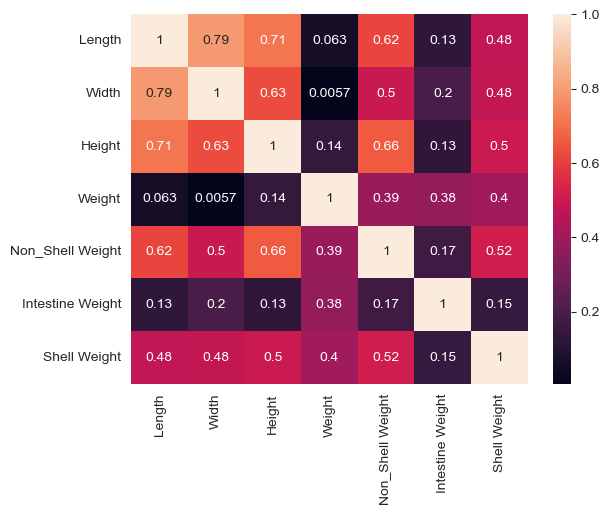

In [320]:
sns.heatmap(request_df_w2.corr(), annot=True)

In [321]:
request_df_w2

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,F,0.614157,0.472408,0.150163,1.467605,0.753579,0.369552,0.331540
1,F,0.679823,0.431224,0.197302,1.283167,0.607568,0.231463,0.407896
2,F,0.766515,0.477704,0.208066,1.155341,0.597403,0.287252,0.267812
3,F,0.710634,0.546251,0.201429,1.529264,0.713318,0.397864,0.401998
4,F,0.714653,0.470363,0.145912,1.258759,0.537808,0.263007,0.365860
...,...,...,...,...,...,...,...,...
289,F,0.655280,0.578281,0.161231,1.713455,0.739542,0.455147,0.466163
290,M,0.710959,0.509665,0.152376,1.876195,0.625235,0.409218,0.299679
291,F,0.616728,0.465206,0.148247,1.448279,0.527931,0.390853,0.329478
292,F,0.699371,0.528919,0.183451,1.346699,0.418202,0.246144,0.494601


# Analyse response to generated data of week 2

In [322]:
requested_molluscs_data_week2 = pd.read_csv('../data/batch2_gutekunst_labels.csv')

In [323]:
# prepare data set (encoder)
requested_molluscs_data_week2 = encode_labels(requested_molluscs_data_week2, existing_encoders=label_encoders)[0]

In [324]:
#run_all_visualizations(requested_molluscs_data_week2, dataset_name='week2')

<Axes: >

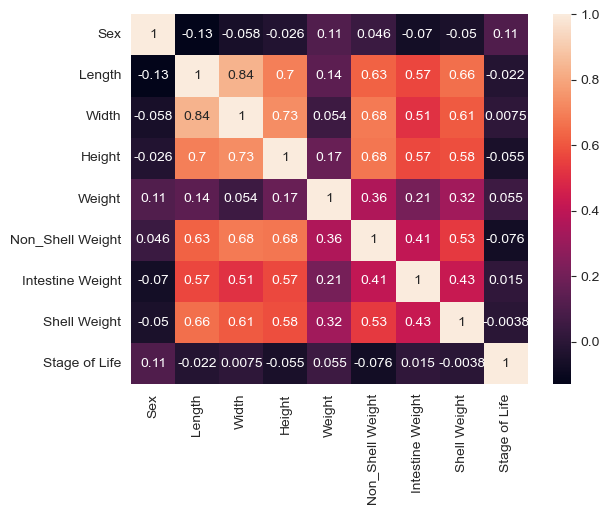

In [325]:
sns.heatmap(requested_molluscs_data_week2.corr(), annot=True)

In [326]:
# store all generated data so far in a variable
total_data_incl_target = total_data_incl_target.append(requested_molluscs_data_week2)
total_data_incl_target

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\3649955073.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data_incl_target = total_data_incl_target.append(requested_molluscs_data_week2)


,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,1,0.163464,0.177184,0.024135,1.575976,0.187435,0.094655,0.145628,1
1,1,0.601825,0.482796,0.167107,1.226926,0.553605,0.265684,0.338952,1
2,2,0.194742,0.182361,0.024102,1.925027,0.072065,0.154005,0.144956,1
3,1,0.568100,0.452336,0.155585,1.052400,0.464975,0.226608,0.296945,1
4,2,0.092768,0.017081,0.079255,1.750502,0.154308,0.156663,0.196754,1
...,...,...,...,...,...,...,...,...,...
289,2,0.584453,0.539956,0.183421,1.545927,0.971168,0.278273,0.285807,1
290,0,0.701575,0.519545,0.243411,1.966061,0.761535,0.536956,0.370466,1
291,0,0.743341,0.489399,0.223312,1.746034,0.765782,0.255927,0.686133,1
292,0,0.542963,0.520437,0.219317,1.751056,0.482525,0.242829,0.262256,1


In [327]:
#run_all_visualizations(total_data_incl_target, dataset_name='total')

<Axes: >

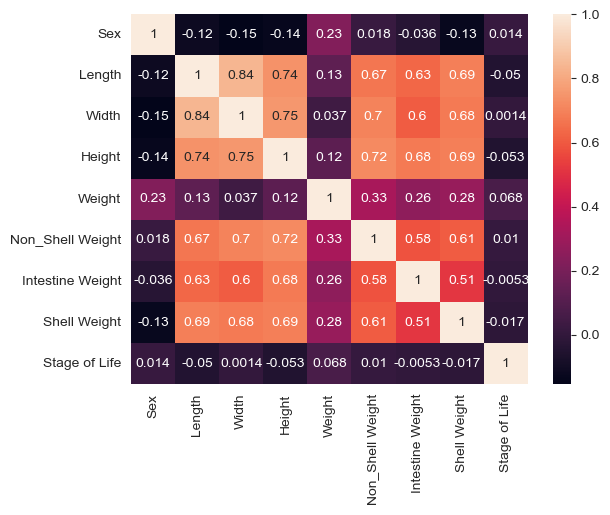

In [328]:
sns.heatmap(total_data_incl_target.corr(), annot=True)

<Axes: >

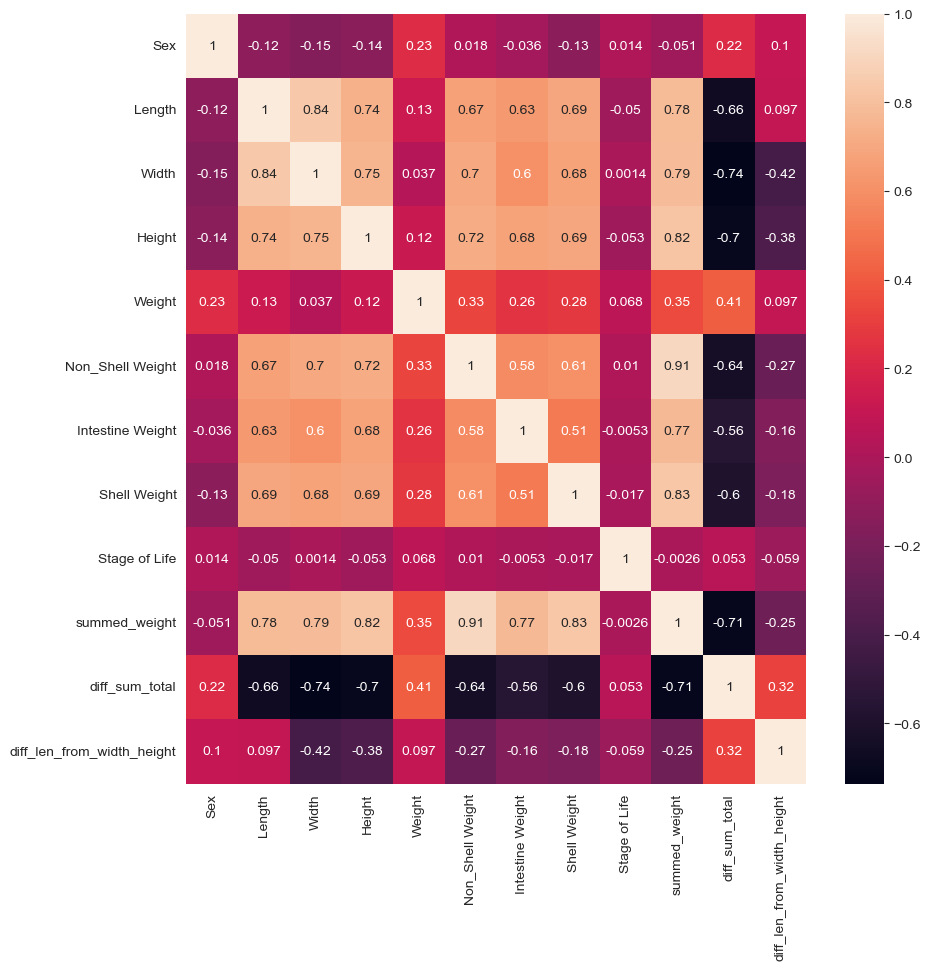

In [329]:
tmp = total_data_incl_target.copy()
tmp['summed_weight'] = tmp['Non_Shell Weight'] + tmp['Shell Weight'] + tmp['Intestine Weight']
tmp['diff_sum_total'] = tmp['Weight'] - tmp['summed_weight']
tmp['diff_len_from_width_height'] = tmp['Length'] - tmp['Width'] - tmp['Height']

plt.figure(figsize=(10,10))
sns.heatmap(tmp.corr(), annot=True)

There are very little children and adolescents in the data set.
Take a closer look at their feature combinations.

In [330]:
complete_data_children = total_data_incl_target[total_data_incl_target['Stage of Life']==2]
complete_data_adole = total_data_incl_target[total_data_incl_target['Stage of Life']==0]
complete_data_adults = total_data_incl_target[total_data_incl_target['Stage of Life']==1]
complete_data_children

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
8,1,0.174425,0.122221,0.061692,1.663239,0.456691,0.000144,0.026082,2
38,2,0.931369,0.728057,0.140091,2.121368,0.773371,0.374050,0.380335,2
56,2,0.174425,0.122221,0.061692,1.728686,0.456691,0.000144,0.026082,2
86,2,0.931369,0.728057,0.140091,2.154092,0.773371,0.374050,0.380335,2
104,2,0.174425,0.122221,0.061692,1.695963,0.456691,0.000144,0.026082,2
112,1,0.229286,0.075412,0.041359,1.652331,0.358187,0.121906,0.022243,2
134,2,0.931369,0.728057,0.140091,2.105007,0.773371,0.374050,0.380335,2
153,1,0.105439,0.088399,0.059998,1.197772,0.383387,0.206580,0.124801,2
155,1,0.174425,0.122221,0.061692,2.208455,0.456691,0.000144,0.026082,2
163,0,0.229286,0.075412,0.041359,1.455022,0.358187,0.121906,0.022243,2


In [331]:
#run_all_visualizations(complete_data_children, dataset_name='all children')

After analysing the bar plots, the feature value ranges become clear.
Length: [0.1,0.9], few values within [0.3,0.5]
Width: [0.0,0.7], few values within [0.2,0.3]
Height: [0.05,0.28], few values within [0.1,0.15]
Weight: [1.0,2.2]
Non_Shell_Weight: [0.2,1.0], few values within [0.2,0.3] and [0.5,0.6]
Intestine Weight: [0.0,0.6], few values within  [0.15,0.35]
Shell Weight: [0.0, 0.6], few values within [0.1,0.3] and [0.4,0.6]
Few Male and female!

After a second look, the feature value ranges of children are very similar to those of adults.
However, to generate new data, I will use existing feature value ranges of children which differs from those of adults:
children  populated feature range which differ from adults:
Length: [0.0,0.4]
Width: [0.0, 0.2]
Height: [0.0,0.1]
Weight: [0.5, 2.5] same as adults
Non_Shell Weight: [0.2,0.4]
Intestine Weight: [0.0,0.2] right side of children KDE is way higher with regards to total maximum than for adults
Shell Weight: [0.0,0.2]

In [332]:
#run_all_visualizations(complete_data_adole, dataset_name='all adolescents')

After analysing the bar plots, the feature value ranges of adolescents become clear.
They are very similar to those of children except for the following:
Weight: max. interval +0.05
Shell Weight: max. interval + 0.1

In [333]:
#run_all_visualizations(complete_data_adults, dataset_name='all adults')

After analysing the bar plots, the feature value ranges of adults become clear.
They are very similar to the others.

Initially, my plan was to generate data for children and adolescents by filling the gaps/intervals with few entries within the existing feature range.
However, since all Stages of life seem to have very similar feature value ranges, I will generate data within the already populated feature ranges (which differ most from adults).

Another idea is that the shell - no_shell weight ratio is not similar for all stages of life.

In [334]:
tmp

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life,summed_weight,diff_sum_total,diff_len_from_width_height
0,1,0.163464,0.177184,0.024135,1.575976,0.187435,0.094655,0.145628,1,0.427718,1.148258,-0.037855
1,1,0.601825,0.482796,0.167107,1.226926,0.553605,0.265684,0.338952,1,1.158242,0.068684,-0.048078
2,2,0.194742,0.182361,0.024102,1.925027,0.072065,0.154005,0.144956,1,0.371026,1.554001,-0.011721
3,1,0.568100,0.452336,0.155585,1.052400,0.464975,0.226608,0.296945,1,0.988527,0.063873,-0.039820
4,2,0.092768,0.017081,0.079255,1.750502,0.154308,0.156663,0.196754,1,0.507724,1.242777,-0.003567
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2,0.584453,0.539956,0.183421,1.545927,0.971168,0.278273,0.285807,1,1.535248,0.010679,-0.138924
290,0,0.701575,0.519545,0.243411,1.966061,0.761535,0.536956,0.370466,1,1.668957,0.297104,-0.061381
291,0,0.743341,0.489399,0.223312,1.746034,0.765782,0.255927,0.686133,1,1.707842,0.038191,0.030630
292,0,0.542963,0.520437,0.219317,1.751056,0.482525,0.242829,0.262256,1,0.987610,0.763446,-0.196791


<Axes: >

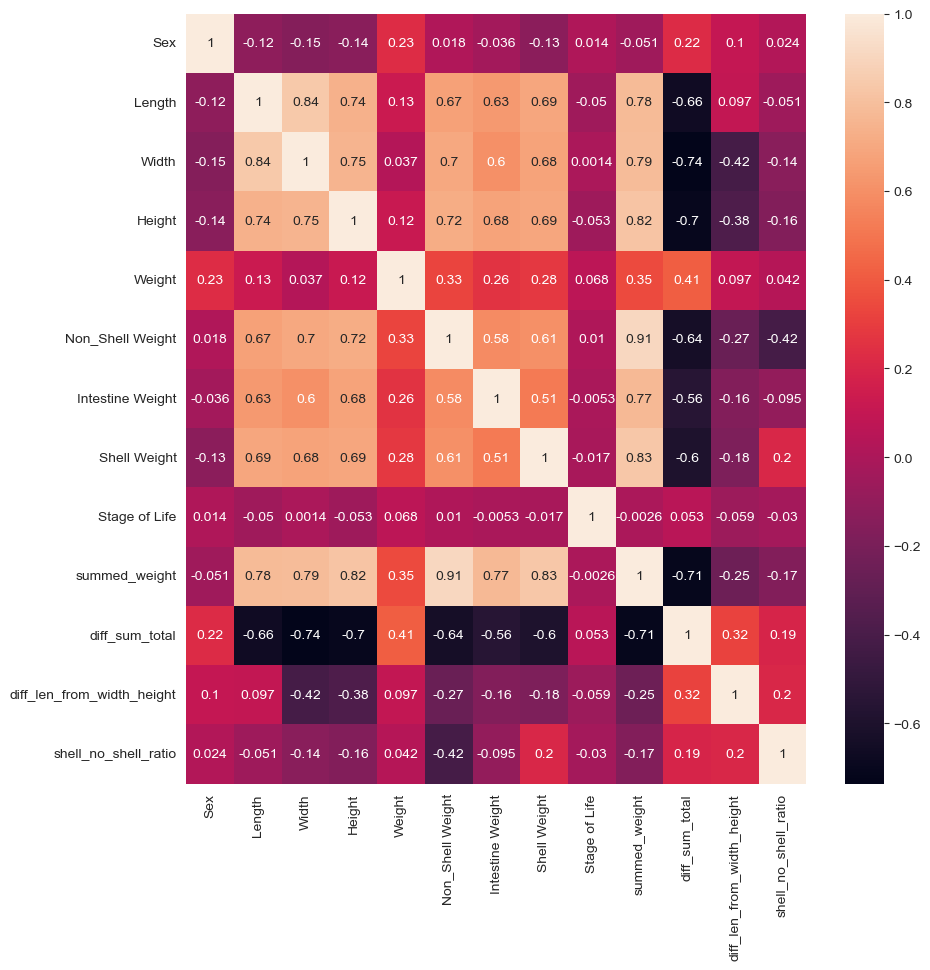

In [335]:
tmp['shell_no_shell_ratio'] = tmp['Shell Weight'] / tmp['Non_Shell Weight']
plt.figure(figsize=(10,10))
sns.heatmap(tmp.corr(), annot=True)

[0.3653982716270557, 0.18867225128286821, 0.2423211381750844]


([<matplotlib.patches.Wedge at 0x2114e16b400>,
 [Text(0.14192047469072383, 1.0908063892660145, 'Non_Shell'),
  Text(-0.9728793935364918, -0.5133280487486226, 'Intestine'),
  Text(0.6345573756817933, -0.8985193025015299, 'Shell')])

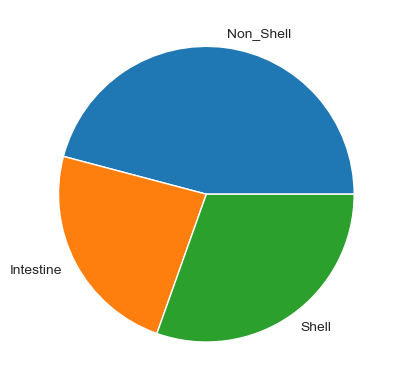

In [336]:
values = [(tmp['Non_Shell Weight']/tmp['Weight']).mean(), (tmp['Intestine Weight']/tmp['Weight']).mean(), (tmp['Shell Weight']/tmp['Weight']).mean()]
print(values)
plt.pie(values, labels=['Non_Shell', 'Intestine', 'Shell'])

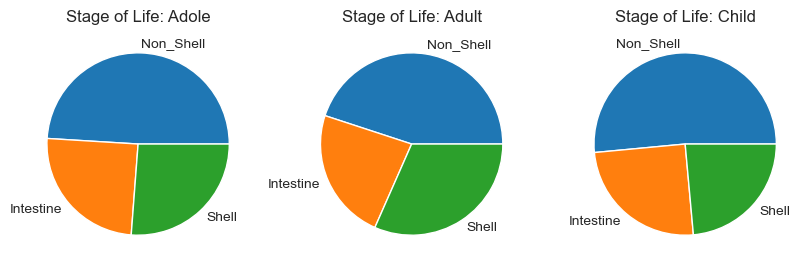

In [337]:
plt.figure(figsize=(10,10))
for age in range(3):
    ax = plt.subplot(1, 3, age + 1)
    tmp_age = tmp[tmp['Stage of Life']==age]
    values = [(tmp_age['Non_Shell Weight']/tmp_age['Weight']).mean(), (tmp_age['Intestine Weight']/tmp_age['Weight']).mean(), (tmp_age['Shell Weight']/tmp_age['Weight']).mean()]
    plt.pie(values, labels=['Non_Shell', 'Intestine', 'Shell'])
    plt.title('Stage of Life: ' + label_encoders['Stage of Life'].inverse_transform([age])[0])
plt.show()

one may conclude the following:
- the ratio is very similar for all stages of life
- Non_Shell >= Intestine + Shell for child and adolescent

# Generate data for week 3

1. Since it is my goal to generate data for children and adolescents, I will use the feature value ranges of children and adolescents.
2. I want to generate a lot of females and male, because there is a serious shortage for children.
3. I will generate more data than last time, because I will be busy until late evening next thursday.
4. I will make sure that the ratio of Non_Shell, Intestine and Shell is similar to the existing data of children and adolescents.

In [338]:
requested_molluscs_data_week3 = pd.DataFrame(columns=features)

In [339]:
# (3) calculate the number of molluscs to generate
data_set_size = 294 + 6
print('Dataset size: ', data_set_size, ' and days necessary to generate: ', (data_set_size*30)/(24*2*30))

Dataset size:  300  and days necessary to generate:  6.25


In [340]:
from random import shuffle
# (2) sex distribution
num_females = int(data_set_size * 0.5)
num_males = int(data_set_size * 0.4)
num_unknown = data_set_size - num_females - num_males
sex_w3 = np.concatenate((np.array(lable_encoder_sex.transform(['F' for female in range(num_females)])), np.array(lable_encoder_sex.transform(['M' for male in range(num_males)])), np.array(lable_encoder_sex.transform(['I' for intersex in range(num_unknown)]))))
shuffle(sex_w3)

requested_molluscs_data_week3['Sex'] = sex_w3
requested_molluscs_data_week3['Stage of Life'] = 0
requested_molluscs_data_week3

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
295,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
297,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
298,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [341]:
# (1) feature value ranges
feature_ranges = {
    'Length': [0.0, 0.4],
    'Width': [0.0, 0.2],
    'Height': [0.0, 0.1],
    'Weight': [0.5, 2.5],
    'Non_Shell Weight': [0.2, 0.4],
    'Intestine Weight': [0.0, 0.2],
    'Shell Weight': [0.0, 0.21]
}

In [342]:
for feat in feature_ranges.keys():
    requested_molluscs_data_week3[feat] = halton(n_samples=data_set_size, n_dimensions=2, bounds= [feature_ranges[feat], [-5,5]])[:, 0]

requested_molluscs_data_week3

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,2,0.200000,0.100000,0.050000,1.500000,0.300000,0.100000,0.105000,0
1,2,0.100000,0.050000,0.025000,1.000000,0.250000,0.050000,0.052500,0
2,0,0.300000,0.150000,0.075000,2.000000,0.350000,0.150000,0.157500,0
3,2,0.050000,0.025000,0.012500,0.750000,0.225000,0.025000,0.026250,0
4,2,0.250000,0.125000,0.062500,1.750000,0.325000,0.125000,0.131250,0
...,...,...,...,...,...,...,...,...,...
295,0,0.032031,0.016016,0.008008,0.660156,0.216016,0.016016,0.016816,0
296,0,0.232031,0.116016,0.058008,1.660156,0.316016,0.116016,0.121816,0
297,0,0.132031,0.066016,0.033008,1.160156,0.266016,0.066016,0.069316,0
298,2,0.332031,0.166016,0.083008,2.160156,0.366016,0.166016,0.174316,0


In [343]:
# (4) calculate the ratio of Non_Shell, Intestine and Shell
requested_molluscs_data_week3['Non_Shell Weight'] = requested_molluscs_data_week3['Intestine Weight'] + requested_molluscs_data_week3['Shell Weight']  + np.random.uniform(0, 0.05, data_set_size)

requested_molluscs_data_week3['Weight'] = requested_molluscs_data_week3['Non_Shell Weight'] + requested_molluscs_data_week3['Intestine Weight'] + requested_molluscs_data_week3['Shell Weight']  + np.random.uniform(0, 0.02, data_set_size)

requested_molluscs_data_week3

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,2,0.200000,0.100000,0.050000,0.446915,0.230419,0.100000,0.105000,0
1,2,0.100000,0.050000,0.025000,0.255321,0.150566,0.050000,0.052500,0
2,0,0.300000,0.150000,0.075000,0.653613,0.330244,0.150000,0.157500,0
3,2,0.050000,0.025000,0.012500,0.137880,0.082833,0.025000,0.026250,0
4,2,0.250000,0.125000,0.062500,0.544330,0.281266,0.125000,0.131250,0
...,...,...,...,...,...,...,...,...,...
295,0,0.032031,0.016016,0.008008,0.112905,0.076731,0.016016,0.016816,0
296,0,0.232031,0.116016,0.058008,0.504329,0.252642,0.116016,0.121816,0
297,0,0.132031,0.066016,0.033008,0.323602,0.177217,0.066016,0.069316,0
298,2,0.332031,0.166016,0.083008,0.702976,0.351303,0.166016,0.174316,0


In [344]:
# DO NOT reverse scaling, bc i did not scale input data
#for feat in features:
#    requested_molluscs_data_week3[feat] = reverse_scale_df(requested_molluscs_data_week3, feat, scalers)

# check consistency of generated data
requested_molluscs_data_week3 = check_consistency(requested_molluscs_data_week3, weight=False)

# valid encoded datatypes
requested_molluscs_data_week3 = post_process_generated_data(requested_molluscs_data_week3, upper_bound=0.01)
#run_all_visualizations(requested_molluscs_data_week3, 'week3')

# decode categorical data
requested_molluscs_data_week3['Sex'] = lable_encoder_sex.inverse_transform(requested_molluscs_data_week3['Sex'])

requested_molluscs_data_week3
#request_df.to_csv('../data/generated_data_week1.csv', index=False)

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,M,0.200000,0.100000,0.050000,0.446915,0.230419,0.100000,0.105000
1,M,0.100000,0.050000,0.025000,0.255321,0.150566,0.050000,0.052500
2,F,0.300000,0.150000,0.075000,0.653613,0.330244,0.150000,0.157500
3,M,0.050000,0.025000,0.012500,0.137880,0.082833,0.025000,0.026250
4,M,0.250000,0.125000,0.062500,0.544330,0.281266,0.125000,0.131250
...,...,...,...,...,...,...,...,...
295,F,0.032031,0.016016,0.008008,0.112905,0.076731,0.016016,0.016816
296,F,0.232031,0.116016,0.058008,0.504329,0.252642,0.116016,0.121816
297,F,0.132031,0.066016,0.033008,0.323602,0.177217,0.066016,0.069316
298,M,0.332031,0.166016,0.083008,0.702976,0.351303,0.166016,0.174316


[0.5297597211362529, 0.21000144911701613, 0.2205015215728669]


([<matplotlib.patches.Wedge at 0x21154a70c70>,
 [Text(-0.17781668226626268, 1.0855326929705154, 'Non_Shell'),
  Text(-0.5833989174107371, -0.9325479629295106, 'Intestine'),
  Text(0.8259756061565492, -0.7264738798018284, 'Shell')])

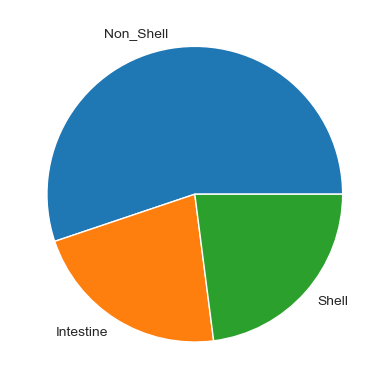

In [345]:
values = [(requested_molluscs_data_week3['Non_Shell Weight']/requested_molluscs_data_week3['Weight']).mean(), (requested_molluscs_data_week3['Intestine Weight']/requested_molluscs_data_week3['Weight']).mean(), (requested_molluscs_data_week3['Shell Weight']/requested_molluscs_data_week3['Weight']).mean()]
print(values)
plt.pie(values, labels=['Non_Shell', 'Intestine', 'Shell'])

In [346]:
#requested_molluscs_data_week3.to_csv('../data/generated_data_week3.csv', index=False)
requested_molluscs_data_week3

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,M,0.200000,0.100000,0.050000,0.446915,0.230419,0.100000,0.105000
1,M,0.100000,0.050000,0.025000,0.255321,0.150566,0.050000,0.052500
2,F,0.300000,0.150000,0.075000,0.653613,0.330244,0.150000,0.157500
3,M,0.050000,0.025000,0.012500,0.137880,0.082833,0.025000,0.026250
4,M,0.250000,0.125000,0.062500,0.544330,0.281266,0.125000,0.131250
...,...,...,...,...,...,...,...,...
295,F,0.032031,0.016016,0.008008,0.112905,0.076731,0.016016,0.016816
296,F,0.232031,0.116016,0.058008,0.504329,0.252642,0.116016,0.121816
297,F,0.132031,0.066016,0.033008,0.323602,0.177217,0.066016,0.069316
298,M,0.332031,0.166016,0.083008,0.702976,0.351303,0.166016,0.174316


# Analysis of generated data from week 3

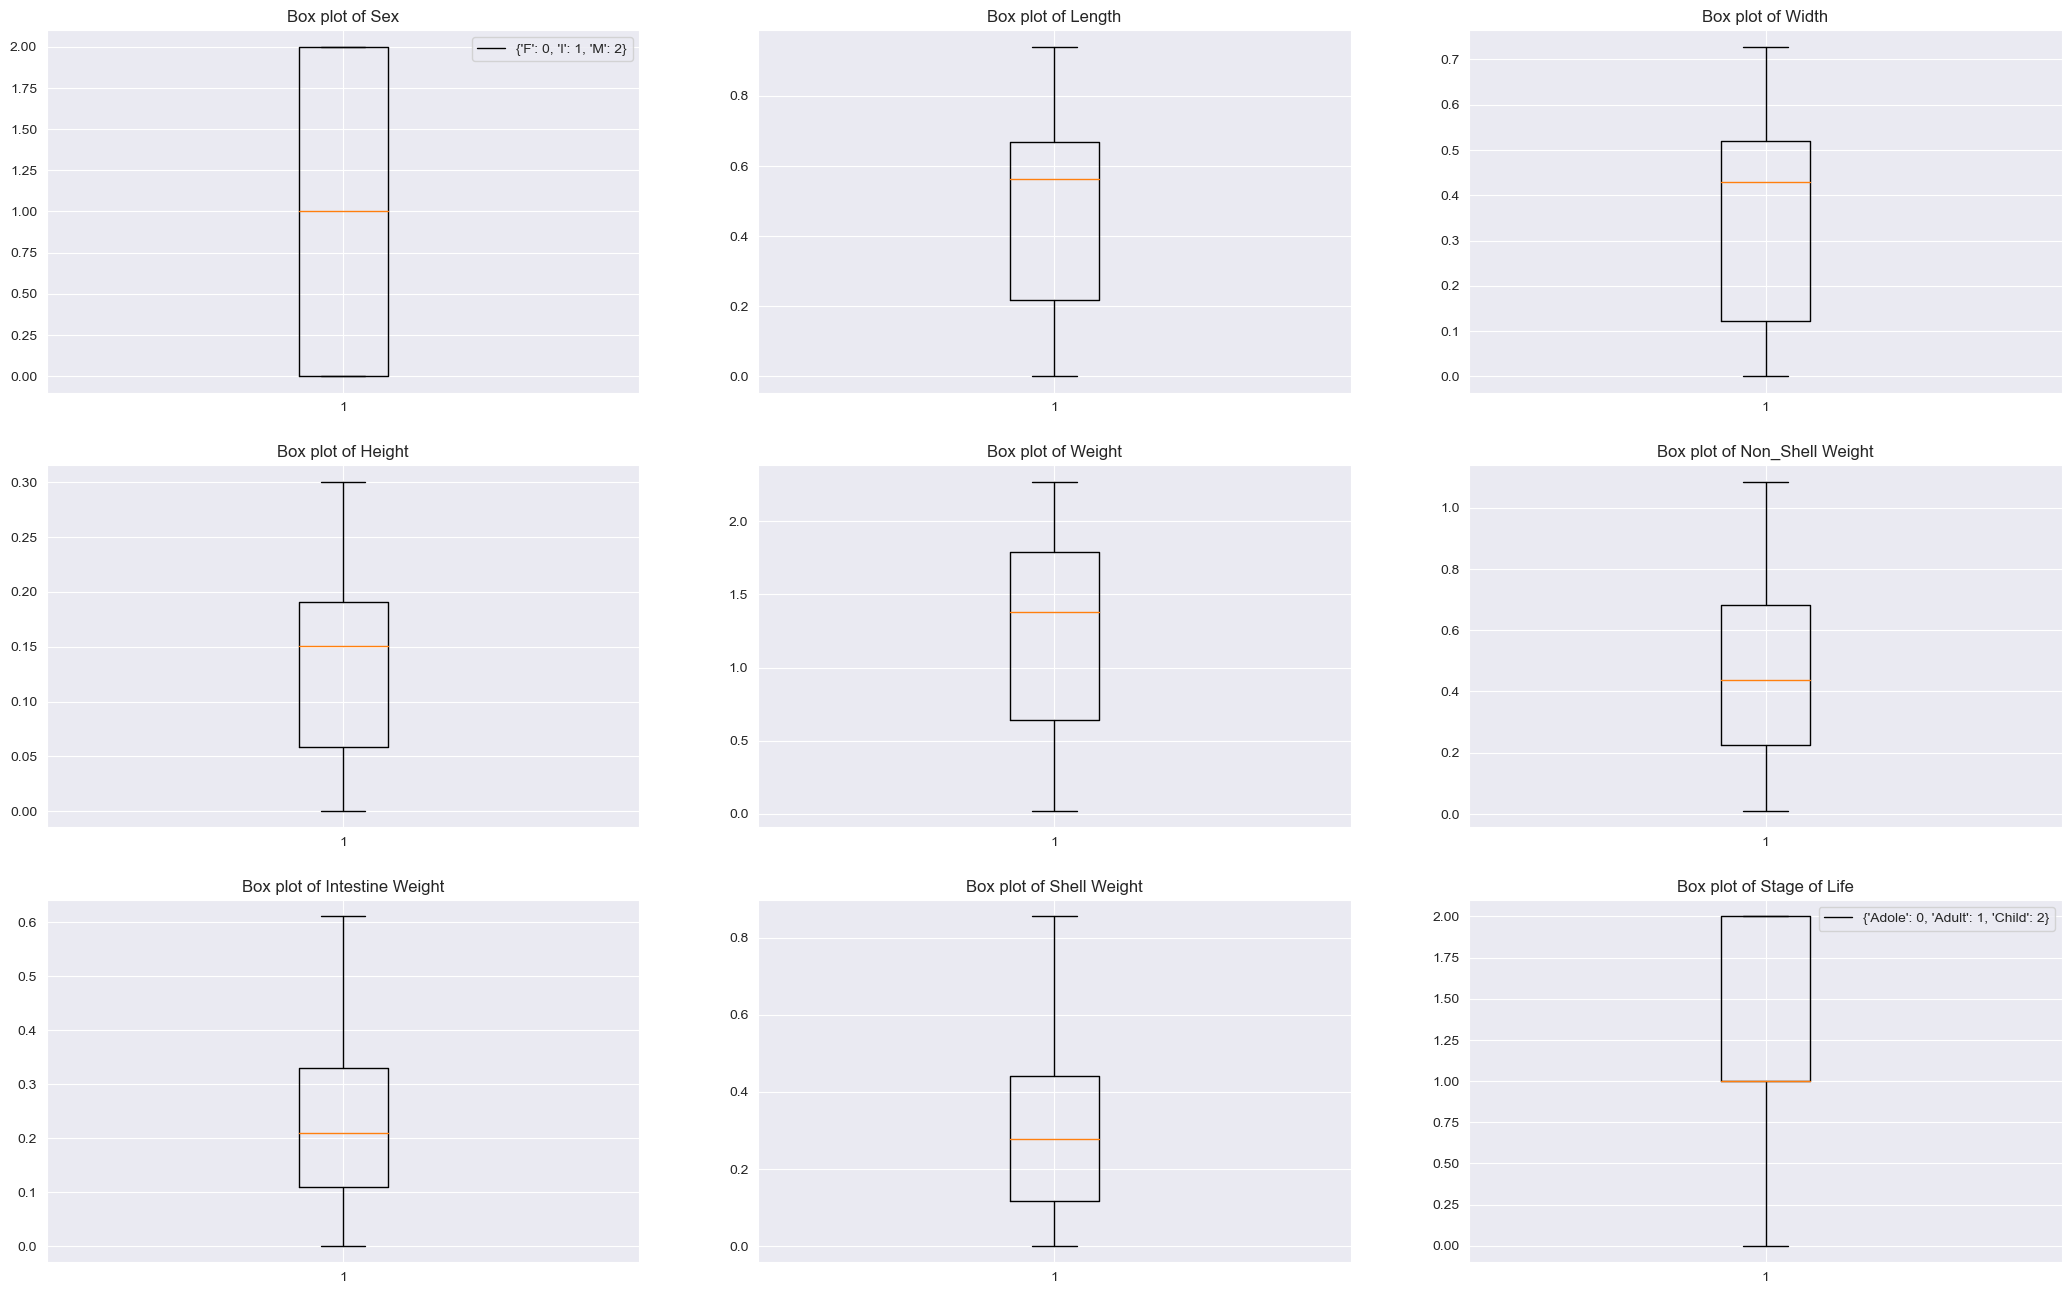

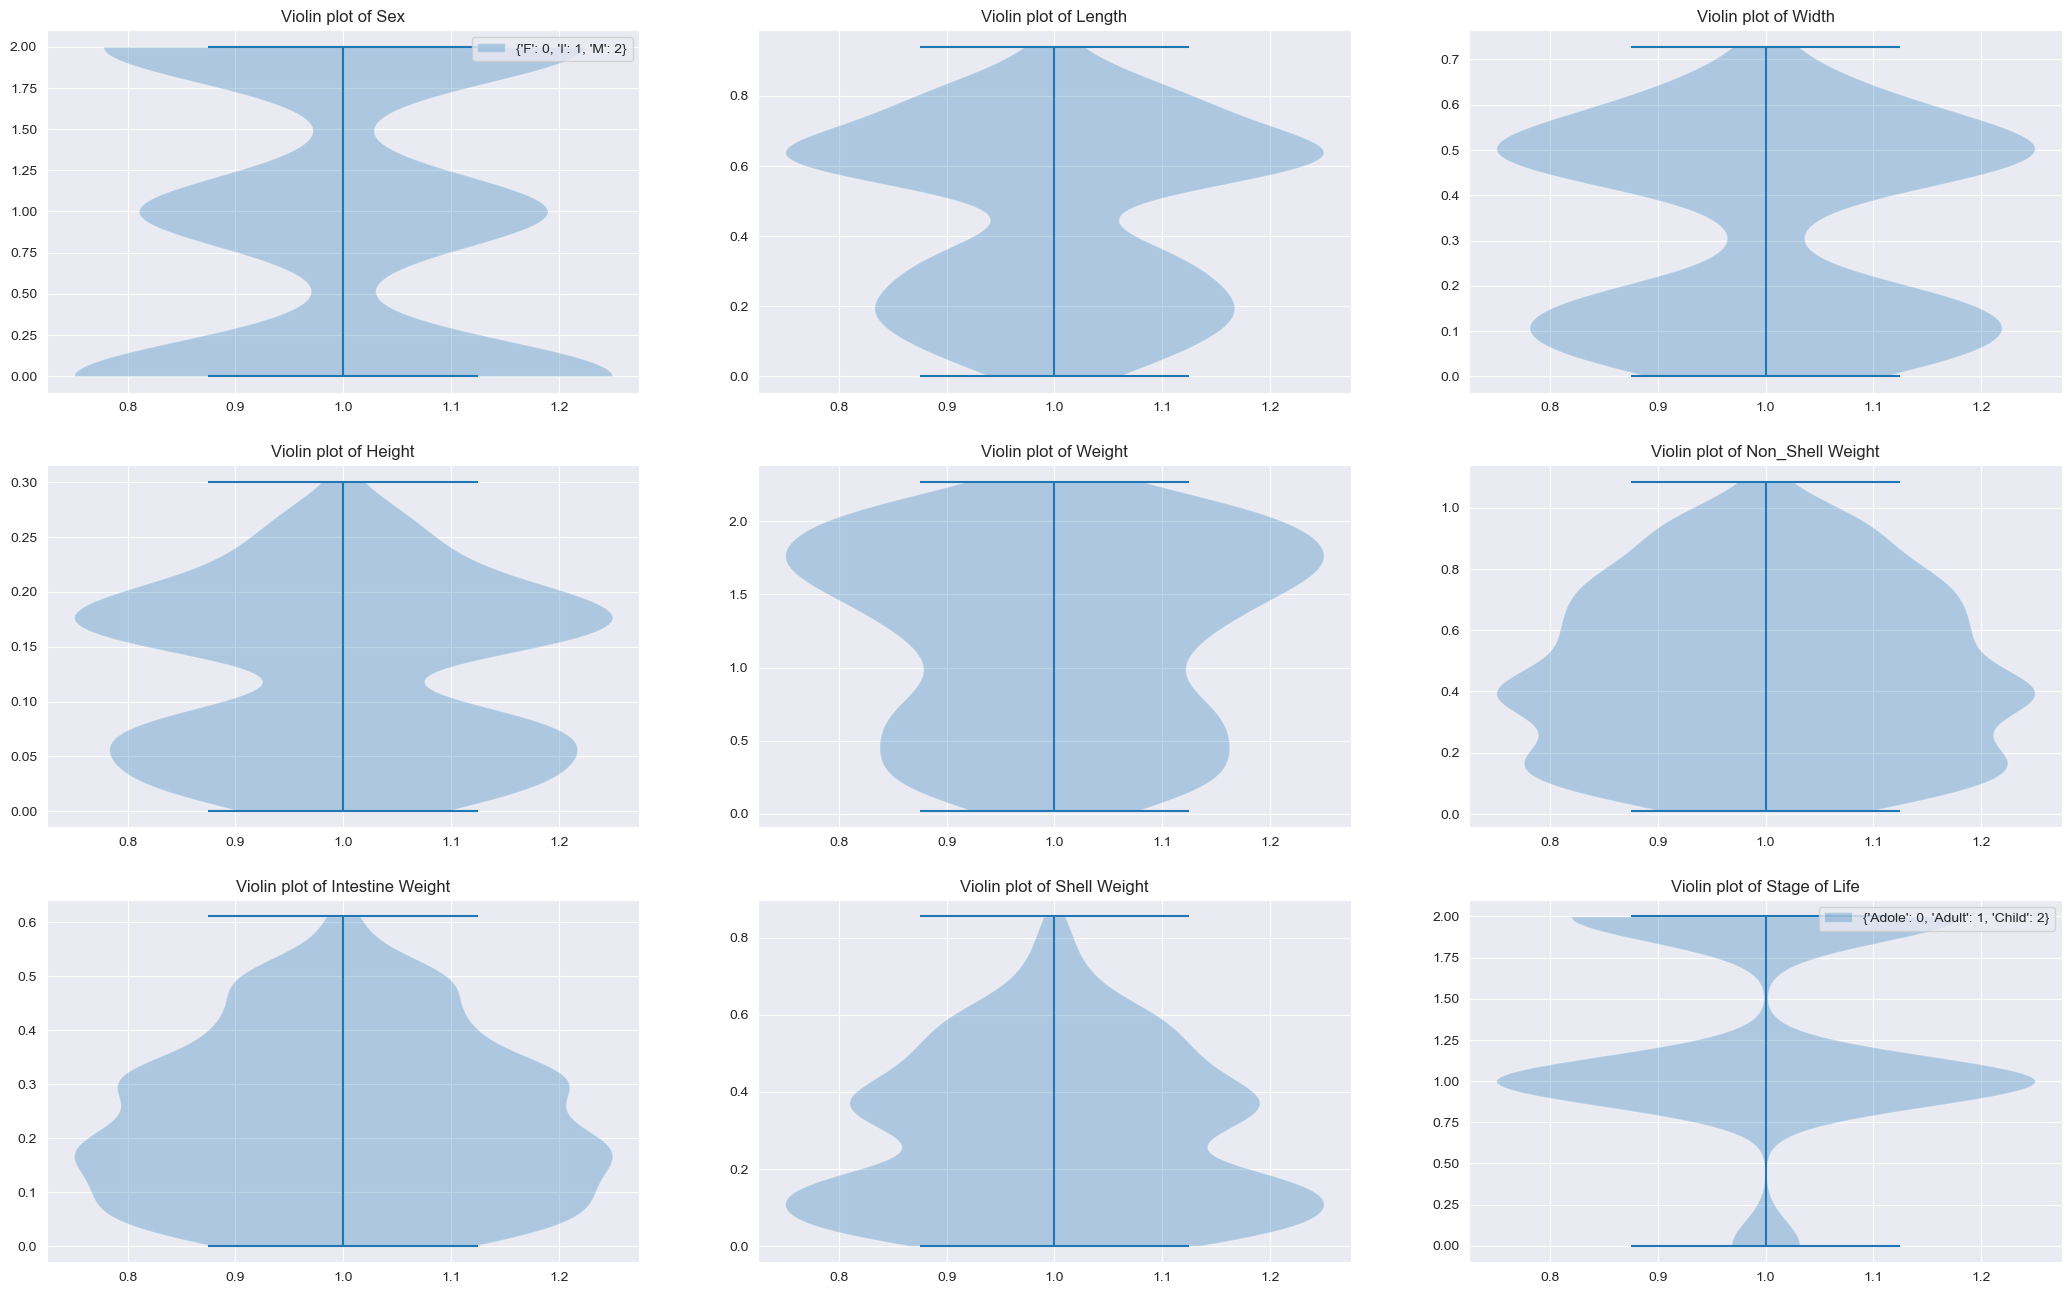

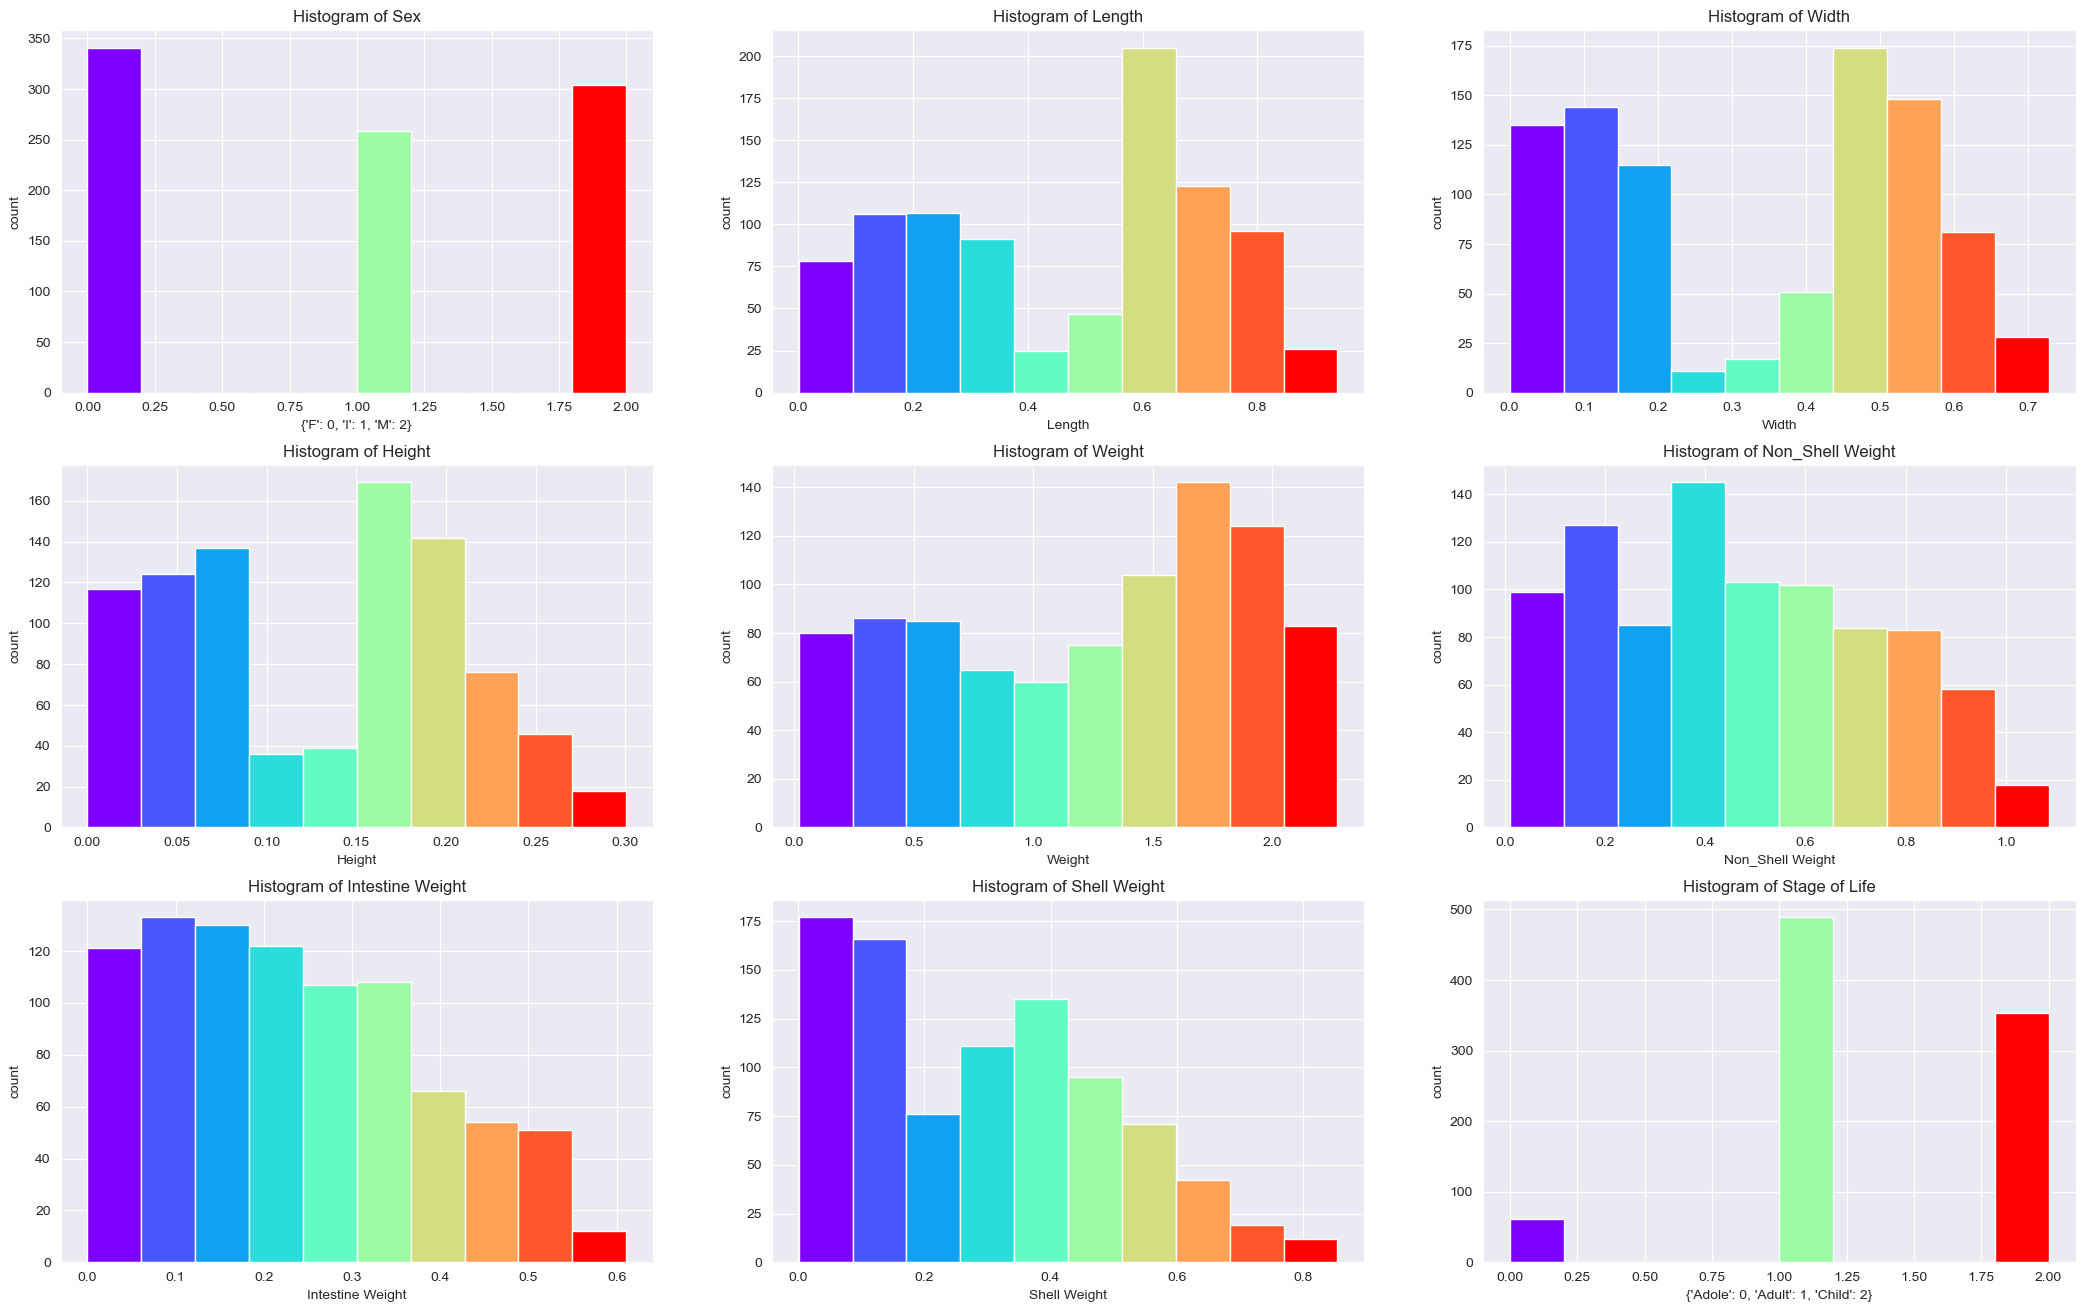

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\2174867542.py:45: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue='Stage of Life')


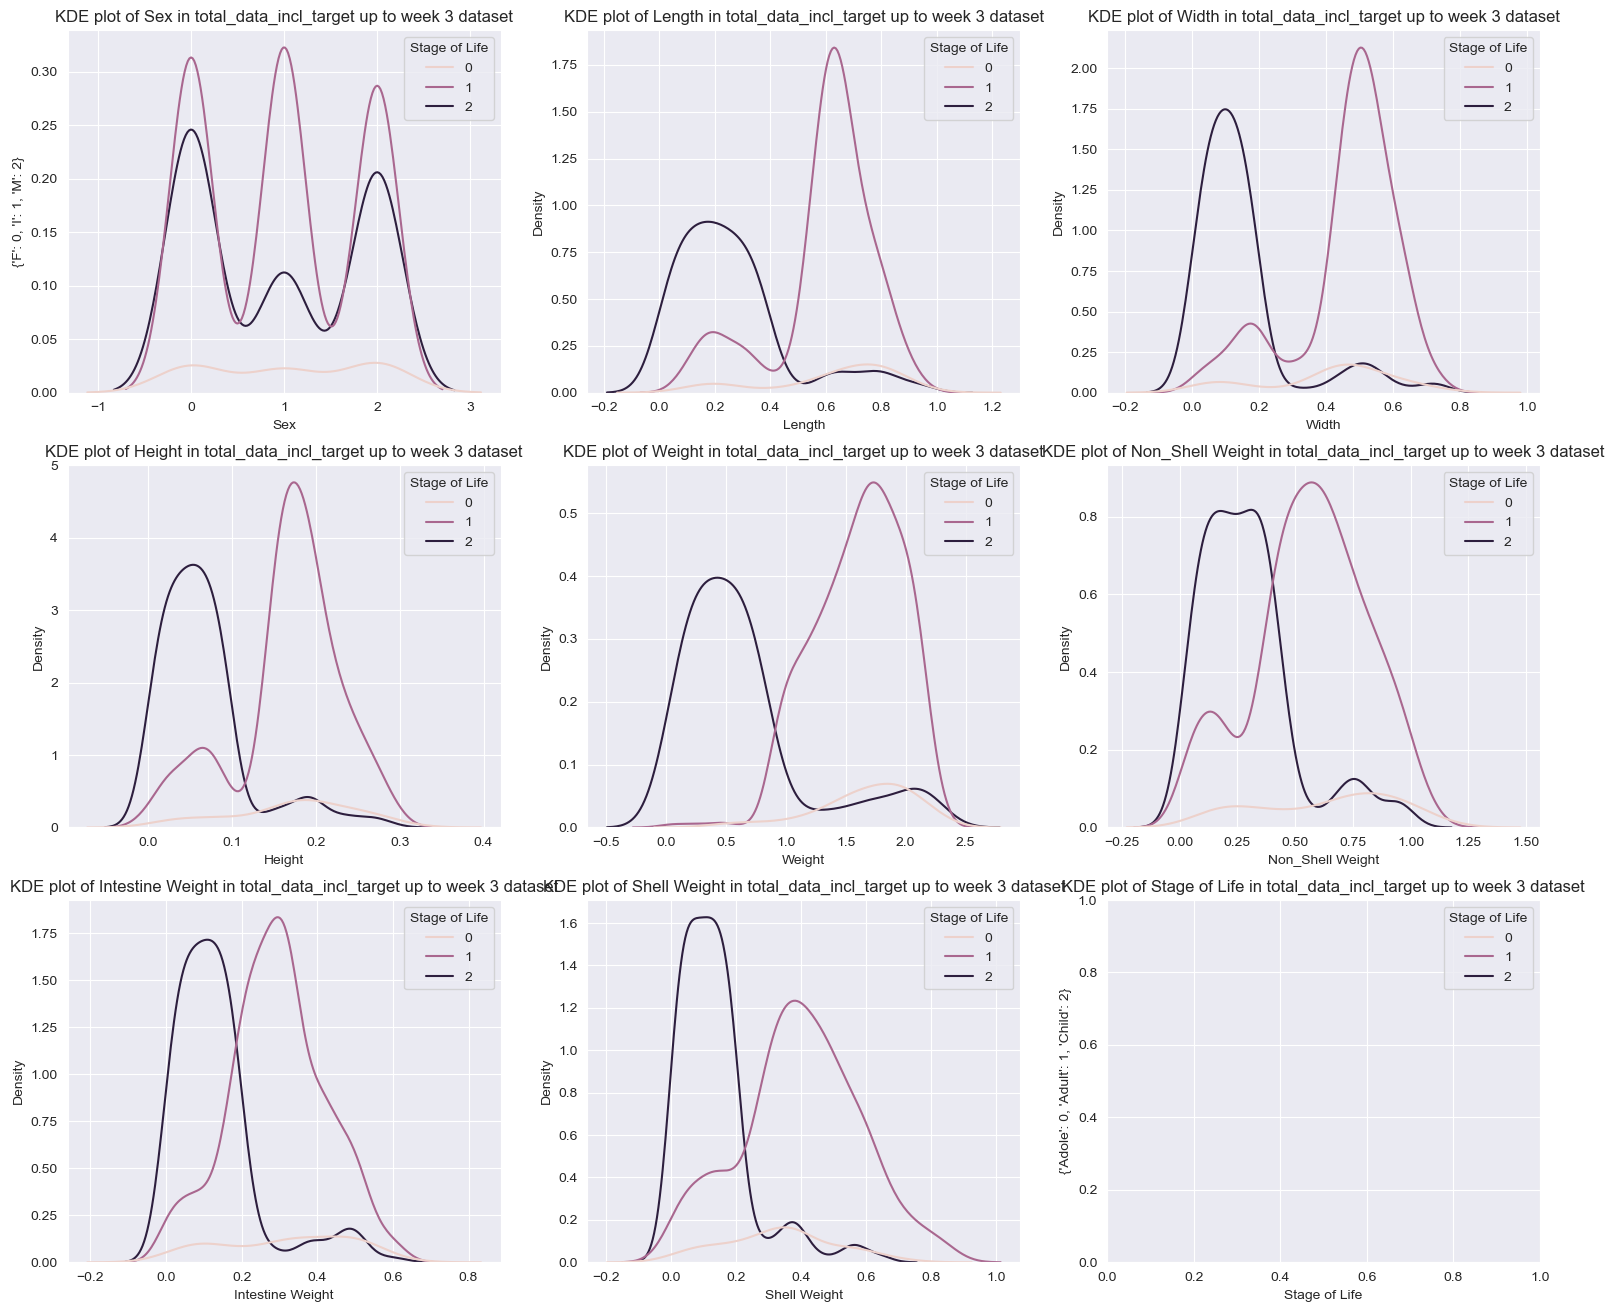

In [347]:
requested_molluscs_data_week3 = pd.read_csv('../data/batch3_gutekunst_labels.csv')
requested_molluscs_data_week3 = encode_labels(requested_molluscs_data_week3, label_encoders)[0]
#run_all_visualizations(requested_molluscs_data_week3, dataset_name='requested_molluscs_data_week3')
total_data_incl_target = pd.concat([total_data_incl_target, requested_molluscs_data_week3], ignore_index=True)
run_all_visualizations(total_data_incl_target, dataset_name='total_data_incl_target up to week 3')
#display(total_data_incl_target)

# classifiers
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [349]:
# split data into train and test set
non_target_features = features.copy().tolist()
non_target_features.remove('Stage of Life')
print(non_target_features)
#display(y_train)

['Sex', 'Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight', 'Intestine Weight', 'Shell Weight']


In [350]:
def train_classifier(data_incl_target, train_split=0.8, target='Stage of Life', random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(data_incl_target[non_target_features], data_incl_target[target], test_size=1-train_split, random_state=random_state)

    rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    rf.fit(X_train, y_train)

    svc = SVC(gamma='auto', probability=True)
    svc.fit(X_train, y_train)

    mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
    mlp.fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, rf, svc, mlp


X_train, X_test, y_train, y_test, rf, svc, mlp = train_classifier(total_data_incl_target)
print('Random Forest: ', rf.score(X_test, y_test))

Random Forest:  0.8066298342541437


In [351]:
print('SVC: ', svc.score(X_test, y_test))

SVC:  0.8397790055248618


In [352]:
print('MLP: ', mlp.score(X_test, y_test))

MLP:  0.9171270718232044


The scores (mean accuracy) on the given test data and labels are good (compared to the results on the whole data set).
To identify regions to request data for, we use predict probabilities of the classifiers.
Using the predict probabilities, we can identify regions where the classifiers are not sure about the prediction.
These regions are the regions we want to request data for.
They have probability values close to 1/#classes=0.5.


In [353]:
'''probas = rf.predict_proba(X_test)
# store probes in dataframe
proba_df_existing_data = pd.DataFrame(probas, columns=[list(cat_code_translation_sex.keys())])
# display(proba_df)

# identify entries which are eqully likely to be in one of the classes
proba_df_existing_data['max_value'] = proba_df_existing_data.max(axis=1)

# drop all rows with a max_value > 0.5 and keep the other columns
for i in range(len(proba_df_existing_data.max_value)):
    if proba_df_existing_data.loc[i,'max_value'].values > 0.5:
        proba_df_existing_data = proba_df_existing_data.drop(i)

proba_df_existing_data'''

"probas = rf.predict_proba(X_test)\n# store probes in dataframe\nproba_df_existing_data = pd.DataFrame(probas, columns=[list(cat_code_translation_sex.keys())])\n# display(proba_df)\n\n# identify entries which are eqully likely to be in one of the classes\nproba_df_existing_data['max_value'] = proba_df_existing_data.max(axis=1)\n\n# drop all rows with a max_value > 0.5 and keep the other columns\nfor i in range(len(proba_df_existing_data.max_value)):\n    if proba_df_existing_data.loc[i,'max_value'].values > 0.5:\n        proba_df_existing_data = proba_df_existing_data.drop(i)\n\nproba_df_existing_data"

In [354]:
def bad_proba_pred(rf, svc, mlp, X_test):
    models = [rf, svc, mlp]
    bad_scores = pd.DataFrame(columns=[list(cat_code_translation_life_stages.keys())])
    for m in models:
        probas = m.predict_proba(X_test)
        # store probes in dataframe
        proba_df = pd.DataFrame(probas, columns=[list(cat_code_translation_life_stages.keys())])

        # identify entries which are eqully likely to be in one of the classes
        proba_df['max_value'] = proba_df.max(axis=1)
        # drop all rows with a max_value > 0.5 and keep the other columns
        for i in range(len(proba_df.max_value)):
            if proba_df.loc[i,'max_value'].values > 0.5:
                proba_df = proba_df.drop(i)
        bad_scores = bad_scores.append(proba_df)

    bad_scores.drop('max_value', axis=1, inplace=True)
    X_test_bad = X_test.iloc[bad_scores.index]
    return bad_scores, X_test_bad

bad_scores, X_test_bad_existing_data = bad_proba_pred(rf, svc, mlp, X_test)


X_test_bad_existing_data

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)


,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
213,1,0.608130,0.169339,0.063369,1.229561,0.035026,0.132777,0.076839
305,1,0.385000,0.280000,0.090000,0.228000,0.102500,0.042000,0.065500
165,2,0.608130,0.169339,0.063369,1.024914,0.035026,0.132777,0.076839
382,0,0.199238,0.141030,0.084877,1.596750,0.156212,0.426520,0.009750
54,2,0.105439,0.088399,0.059998,2.165000,0.383387,0.206580,0.124801
547,0,0.823189,0.529342,0.227387,1.749862,0.927494,0.249887,0.549564
585,0,0.753832,0.552946,0.168257,1.731737,0.904410,0.430978,0.370800
594,1,0.768764,0.491249,0.201796,2.098846,0.934955,0.478006,0.647861
86,2,0.931369,0.728057,0.140091,2.154092,0.773371,0.374050,0.380335
501,0,0.840983,0.523948,0.176850,1.124956,0.461788,0.203791,0.367177


There are few bad scores.
This could be due to the fact, that the test set is not representative for the whole data set, but to the training set.
Retry measurement on new generated data.

In [355]:
# generate data to serve as test data
request_df_w4 = pd.DataFrame(columns=non_target_features)

# (1) feature value ranges
feature_ranges = {
    'Length': [0.0, max(total_data_incl_target['Length']) + total_data_incl_target['Length'].std()],
    'Width': [0.0, max(total_data_incl_target['Width']) + total_data_incl_target['Width'].std()],
    'Height': [0.0, max(total_data_incl_target['Height']) + total_data_incl_target['Height'].std()],
    'Weight': [0.5, max(total_data_incl_target['Weight']) + total_data_incl_target['Weight'].std()],
    'Non_Shell Weight': [0.2, max(total_data_incl_target['Non_Shell Weight']) + total_data_incl_target['Non_Shell Weight'].std()],
    'Intestine Weight': [0.0, max(total_data_incl_target['Intestine Weight']) + total_data_incl_target['Intestine Weight'].std()],
    'Shell Weight': [0.0, max(total_data_incl_target['Shell Weight']) + total_data_incl_target['Shell Weight'].std()],
}

In [356]:
data_set_size = 500
for feat in feature_ranges.keys():
    request_df_w4[feat] = halton(n_samples=data_set_size, n_dimensions=2, bounds= [feature_ranges[feat], [-5,5]])[:, 0]

# sex distribution
num_females = int(data_set_size * 0.2)
num_males = int(data_set_size * 0.35)
num_unknown = data_set_size - num_females - num_males
sex_w4 = np.concatenate((np.array(lable_encoder_sex.transform(['F' for female in range(num_females)])),
                         np.array(lable_encoder_sex.transform(['M' for male in range(num_males)])),
                         np.array(lable_encoder_sex.transform(['I' for intersex in range(num_unknown)]))))
shuffle(sex_w4)

request_df_w4['Sex'] = sex_w4
request_df_w4 = check_consistency(request_df_w4)

request_df_w4

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,2,0.598475,0.472540,0.189538,1.711838,0.778722,0.380424,0.529071
1,0,0.299237,0.236270,0.094769,1.105919,0.489361,0.190212,0.264535
2,1,0.897712,0.708810,0.284306,2.448352,1.068083,0.570636,0.793606
3,0,0.149619,0.118135,0.047384,0.802960,0.344680,0.095106,0.132268
4,1,0.748093,0.590675,0.236922,2.063206,0.923402,0.475530,0.661338
...,...,...,...,...,...,...,...,...
495,2,0.072472,0.057222,0.022952,0.646746,0.270080,0.046067,0.064067
496,2,0.670946,0.529762,0.212489,1.906992,0.848801,0.426491,0.593138
497,1,0.371709,0.293492,0.117721,1.252665,0.559440,0.236279,0.328602
498,1,0.970184,0.766032,0.307258,2.628292,1.138162,0.616703,0.857673


In [357]:
X_train, X_test, y_train, y_test, rf, svc, mlp = train_classifier(total_data_incl_target, train_split=0.99)

In [360]:
bad_scores, X_test_bad_new_data = bad_proba_pred(rf, svc, mlp, request_df_w4)
#print(bad_scores)
X_test_bad_new_data

C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)
C:\Users\klara\AppData\Local\Temp\ipykernel_7572\825517289.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bad_scores = bad_scores.append(proba_df)


,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
17,0,0.336642,0.265804,0.106615,1.181659,0.525531,0.213989,0.297602
70,0,1.056682,0.834329,0.334652,2.849899,1.221806,0.671686,0.934140
73,0,0.383398,0.302721,0.121423,1.276334,0.570744,0.243709,0.338936
74,1,0.981873,0.775261,0.310960,2.651960,1.149465,0.624133,0.868007
78,0,1.131491,0.893396,0.358344,3.048795,1.294146,0.719239,1.000274
81,1,0.345993,0.273187,0.109576,1.200594,0.534574,0.219933,0.305869
90,2,1.019277,0.804795,0.322806,2.774159,1.185636,0.647910,0.901073
102,0,1.075384,0.849096,0.340575,2.887769,1.239891,0.683574,0.950674
113,1,0.364696,0.287954,0.115499,1.238464,0.552659,0.231821,0.322402
122,0,1.037980,0.819562,0.328729,2.812029,1.203721,0.659798,0.917607


In [394]:
data_set_size = 294
request_df_w4 = pd.DataFrame(columns=non_target_features)
gen_samle_per_bad_res = data_set_size//(len(X_test_bad_new_data)+len(X_test_bad_existing_data))

# generate similar data around poor proba existing data
for i in range(len(X_test_bad_existing_data)):
    dict = {}
    for j in X_test_bad_existing_data.columns:
        col_data = X_test_bad_existing_data[j].values[i]
        col_req_data = np.random.normal(loc=col_data, scale=0.05, size=gen_samle_per_bad_res)
        dict[j] = col_req_data
    request_df_w4 = pd.concat([request_df_w4, pd.DataFrame(dict)], ignore_index=True)

# generate data similar to the poor proba new data (incl. the sample itself)
for l in range(len(X_test_bad_new_data)):
    dict = {}
    for k in X_test_bad_new_data.columns:
        col_data = X_test_bad_new_data[k].values[l]
        col_req_data = np.random.normal(loc=col_data, scale=0.05, size=gen_samle_per_bad_res-1)
        dict[k] = col_req_data
        dict[k] = np.append(dict[k], col_data)
    request_df_w4 = pd.concat([request_df_w4, pd.DataFrame(dict)], ignore_index=True)

# fill missing rows up to data_set_size with big values (extrema)
dict = {}
for feat in feature_ranges.keys():
    min_bound = feature_ranges[feat][1]
    dict[feat] = halton(n_samples=data_set_size-len(request_df_w4), n_dimensions=2, bounds= [[min_bound, min_bound*2], [-5,5]])[:, 0]
request_df_w4 = pd.concat([request_df_w4, pd.DataFrame(dict)], ignore_index=True)
request_df_w4['Stage of Life'] = 0
request_df_w4['Sex'].fillna(0, inplace=True)
request_df_w4

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,0.946453,0.569982,0.171209,0.098109,1.273115,0.025452,0.112388,0.108531,0
1,0.867007,0.711411,0.207809,-0.028253,1.194486,-0.003989,0.087511,0.113913,0
2,1.059004,0.615898,0.240639,0.089288,1.168776,-0.004743,0.073469,0.068221,0
3,1.018512,0.532696,0.076466,0.114445,1.217272,0.093375,0.112386,0.028513,0
4,1.065034,0.392926,0.200906,0.067631,0.253973,0.034387,0.024892,0.006761,0
...,...,...,...,...,...,...,...,...,...
289,0.000000,1.664508,1.314252,0.527151,4.065738,1.887695,1.058054,1.471478,0
290,0.000000,2.262982,1.786792,0.716689,5.527576,2.566417,1.438478,2.000548,0
291,0.000000,1.290461,1.018915,0.408690,3.152089,1.463494,0.820289,1.140809,0
292,0.000000,1.888936,1.491455,0.598228,4.613927,2.142216,1.200713,1.669879,0


In [395]:
# check consistency of generated data
request_df_w4 = check_consistency(request_df_w4)

# valid encoded datatypes
request_df_w4 = post_process_generated_data(request_df_w4)
request_df_w4

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,0,0.569982,0.171209,0.098109,1.273115,0.025452,0.112388,0.108531
1,0,0.711411,0.207809,0.497150,1.194486,0.017124,0.087511,0.113913
2,1,0.615898,0.240639,0.089288,1.168776,0.016369,0.073469,0.068221
3,1,0.532696,0.076466,0.114445,1.217272,0.093375,0.112386,0.028513
4,1,0.392926,0.200906,0.067631,0.253973,0.034387,0.024892,0.006761
...,...,...,...,...,...,...,...,...
289,0,1.664508,1.314252,0.527151,4.421247,1.887695,1.058054,1.471478
290,0,2.262982,1.786792,0.716689,6.029060,2.566417,1.438478,2.000548
291,0,1.290461,1.018915,0.408690,3.433725,1.463494,0.820289,1.140809
292,0,1.888936,1.491455,0.598228,5.021427,2.142216,1.200713,1.669879


In [396]:
request_df_w4.Sex.describe()

count    294.000000
mean       0.551020
std        0.702834
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Sex, dtype: float64

In [397]:
# sex distribution
num_females = int(data_set_size * 0.2)
num_males = int(data_set_size * 0.35)
num_unknown = data_set_size - num_females - num_males
sex_w4 = np.concatenate((np.array(lable_encoder_sex.transform(['F' for female in range(num_females)])), np.array(lable_encoder_sex.transform(['M' for male in range(num_males)])), np.array(lable_encoder_sex.transform(['I' for intersex in range(num_unknown)]))))
shuffle(sex_w4)

request_df_w4['Sex'] = sex_w4
request_df_w4

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,2,0.569982,0.171209,0.098109,1.273115,0.025452,0.112388,0.108531
1,2,0.711411,0.207809,0.497150,1.194486,0.017124,0.087511,0.113913
2,1,0.615898,0.240639,0.089288,1.168776,0.016369,0.073469,0.068221
3,1,0.532696,0.076466,0.114445,1.217272,0.093375,0.112386,0.028513
4,1,0.392926,0.200906,0.067631,0.253973,0.034387,0.024892,0.006761
...,...,...,...,...,...,...,...,...
289,0,1.664508,1.314252,0.527151,4.421247,1.887695,1.058054,1.471478
290,2,2.262982,1.786792,0.716689,6.029060,2.566417,1.438478,2.000548
291,2,1.290461,1.018915,0.408690,3.433725,1.463494,0.820289,1.140809
292,1,1.888936,1.491455,0.598228,5.021427,2.142216,1.200713,1.669879


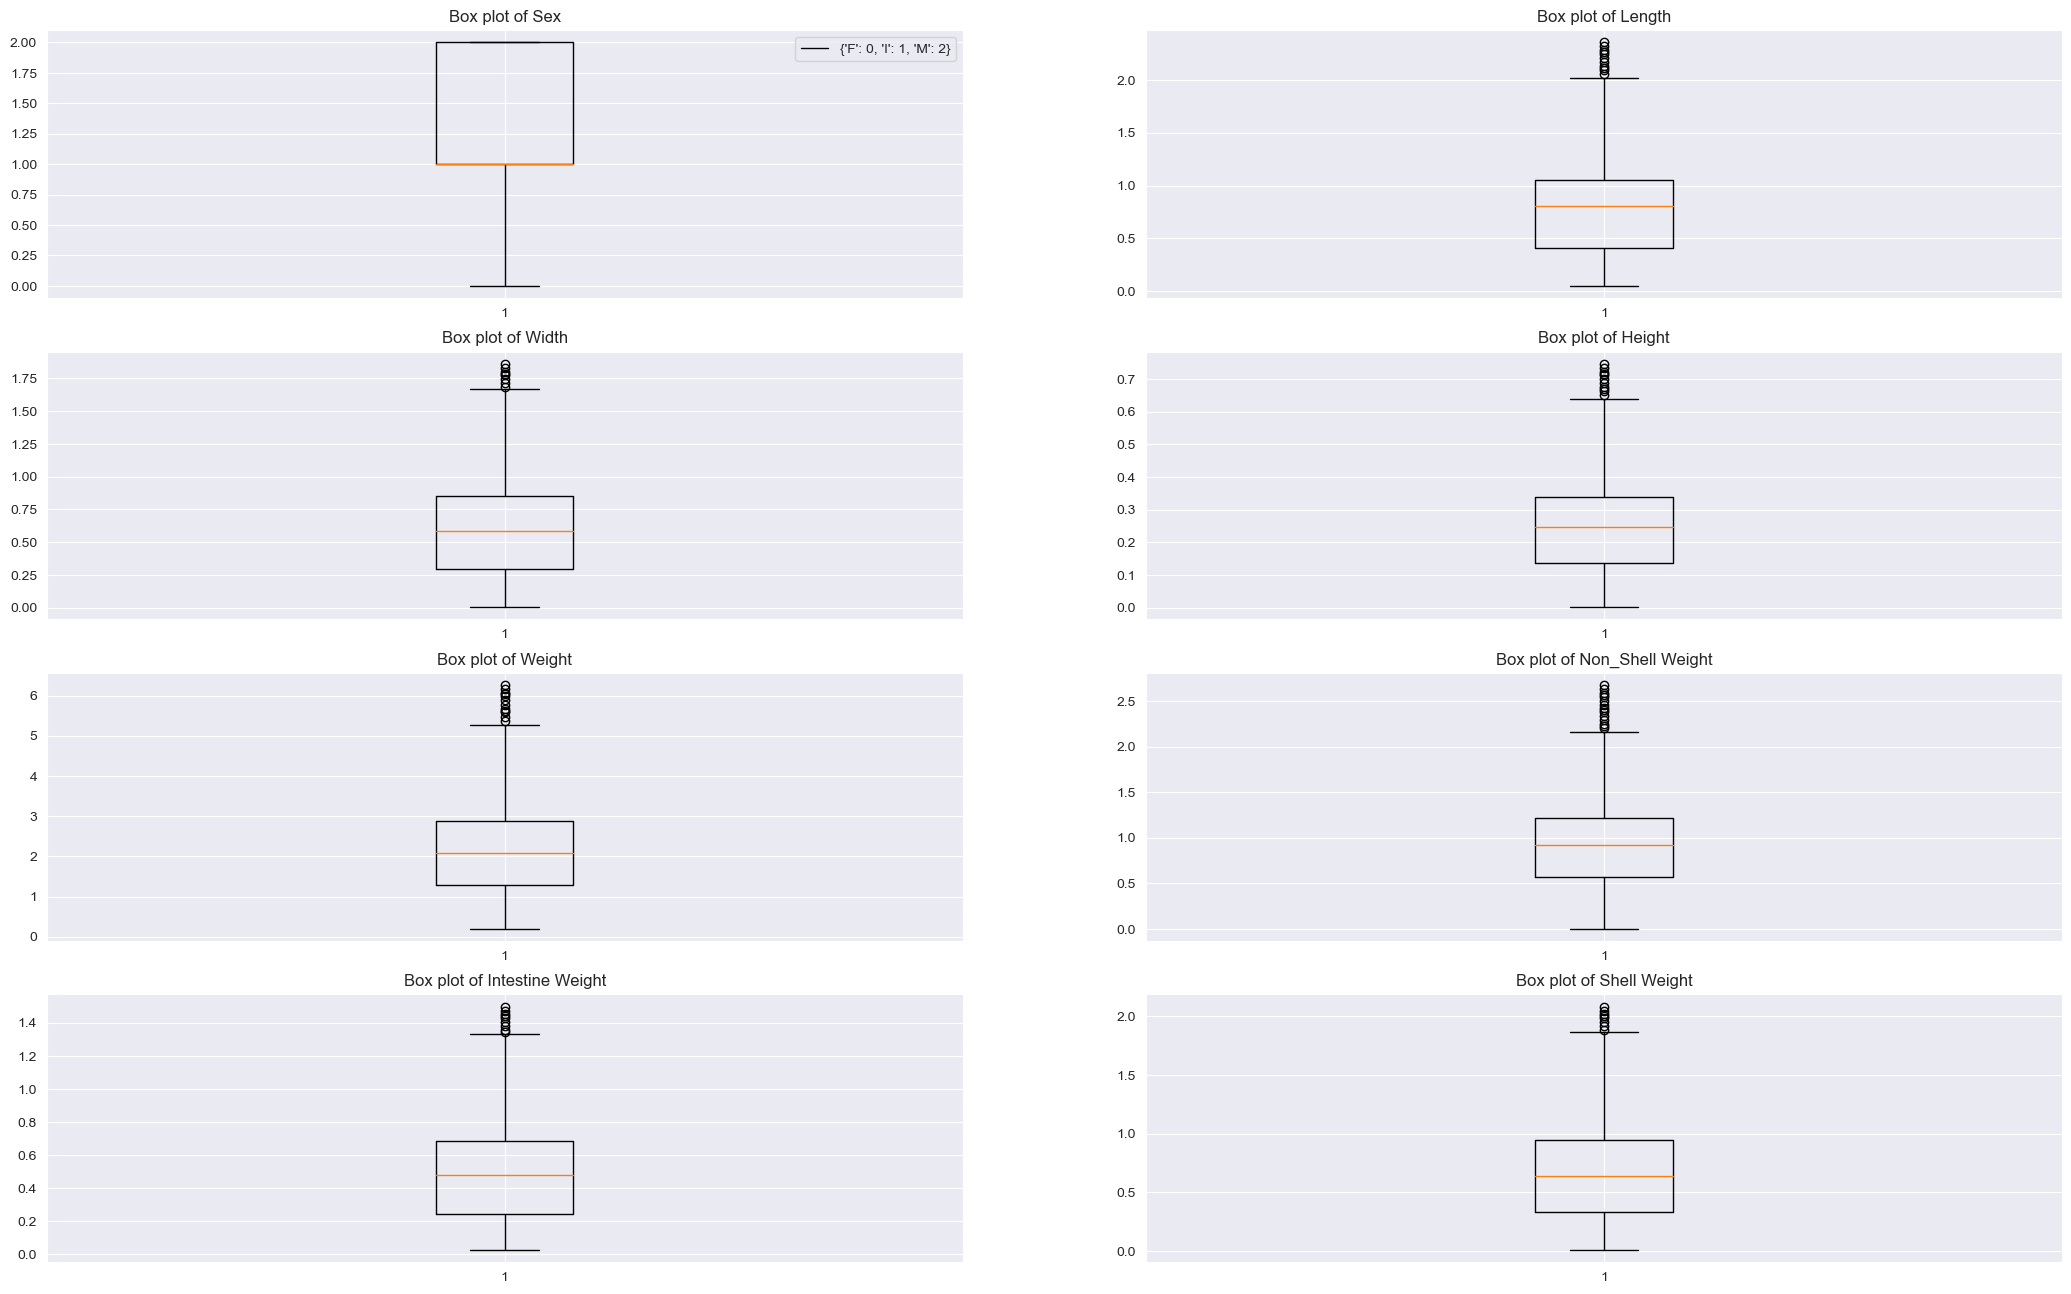

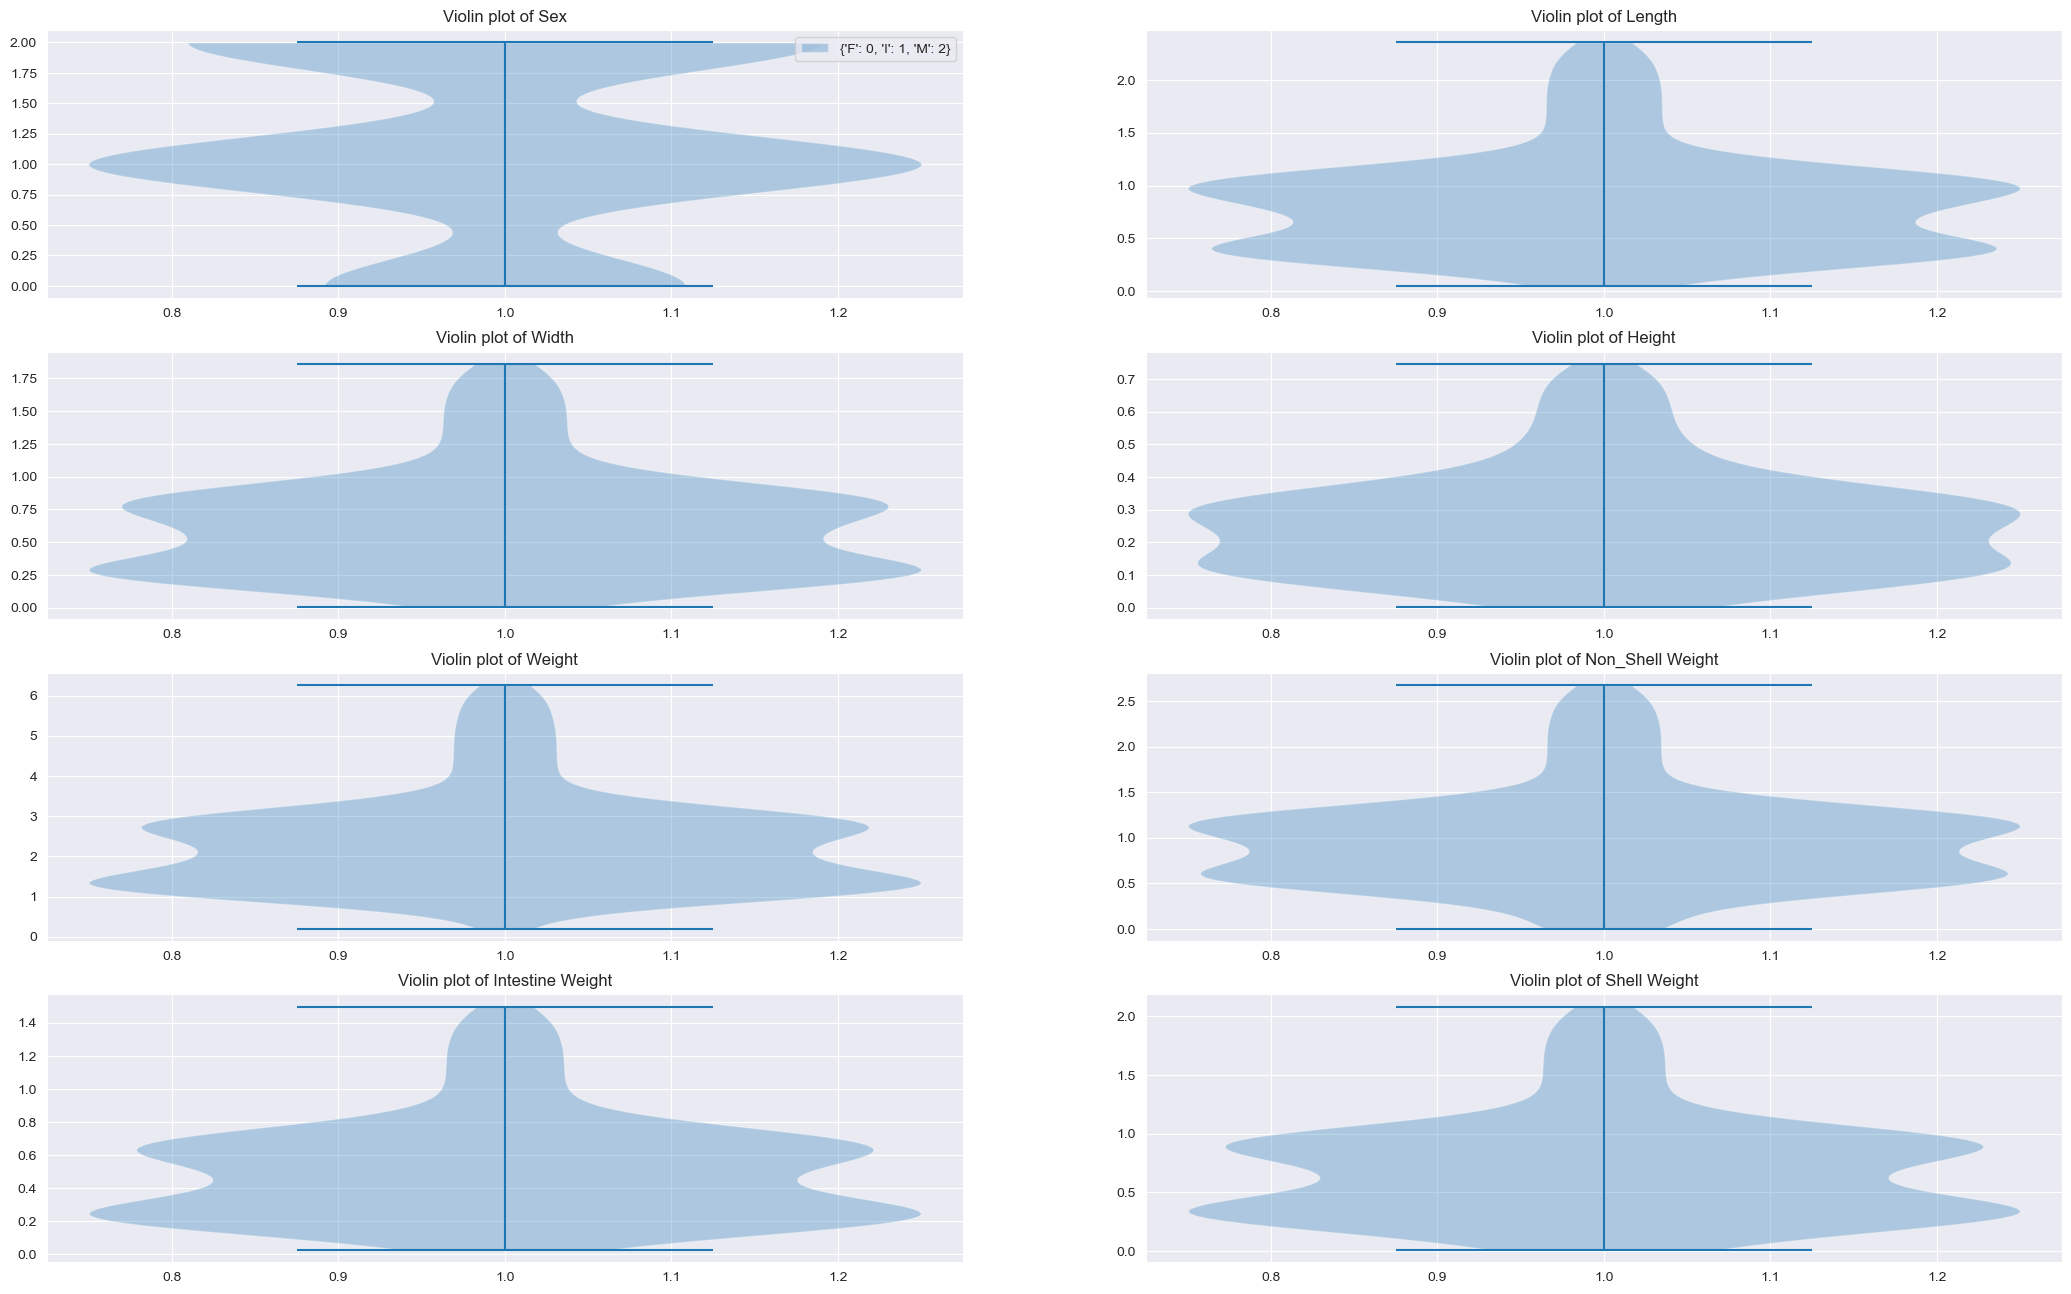

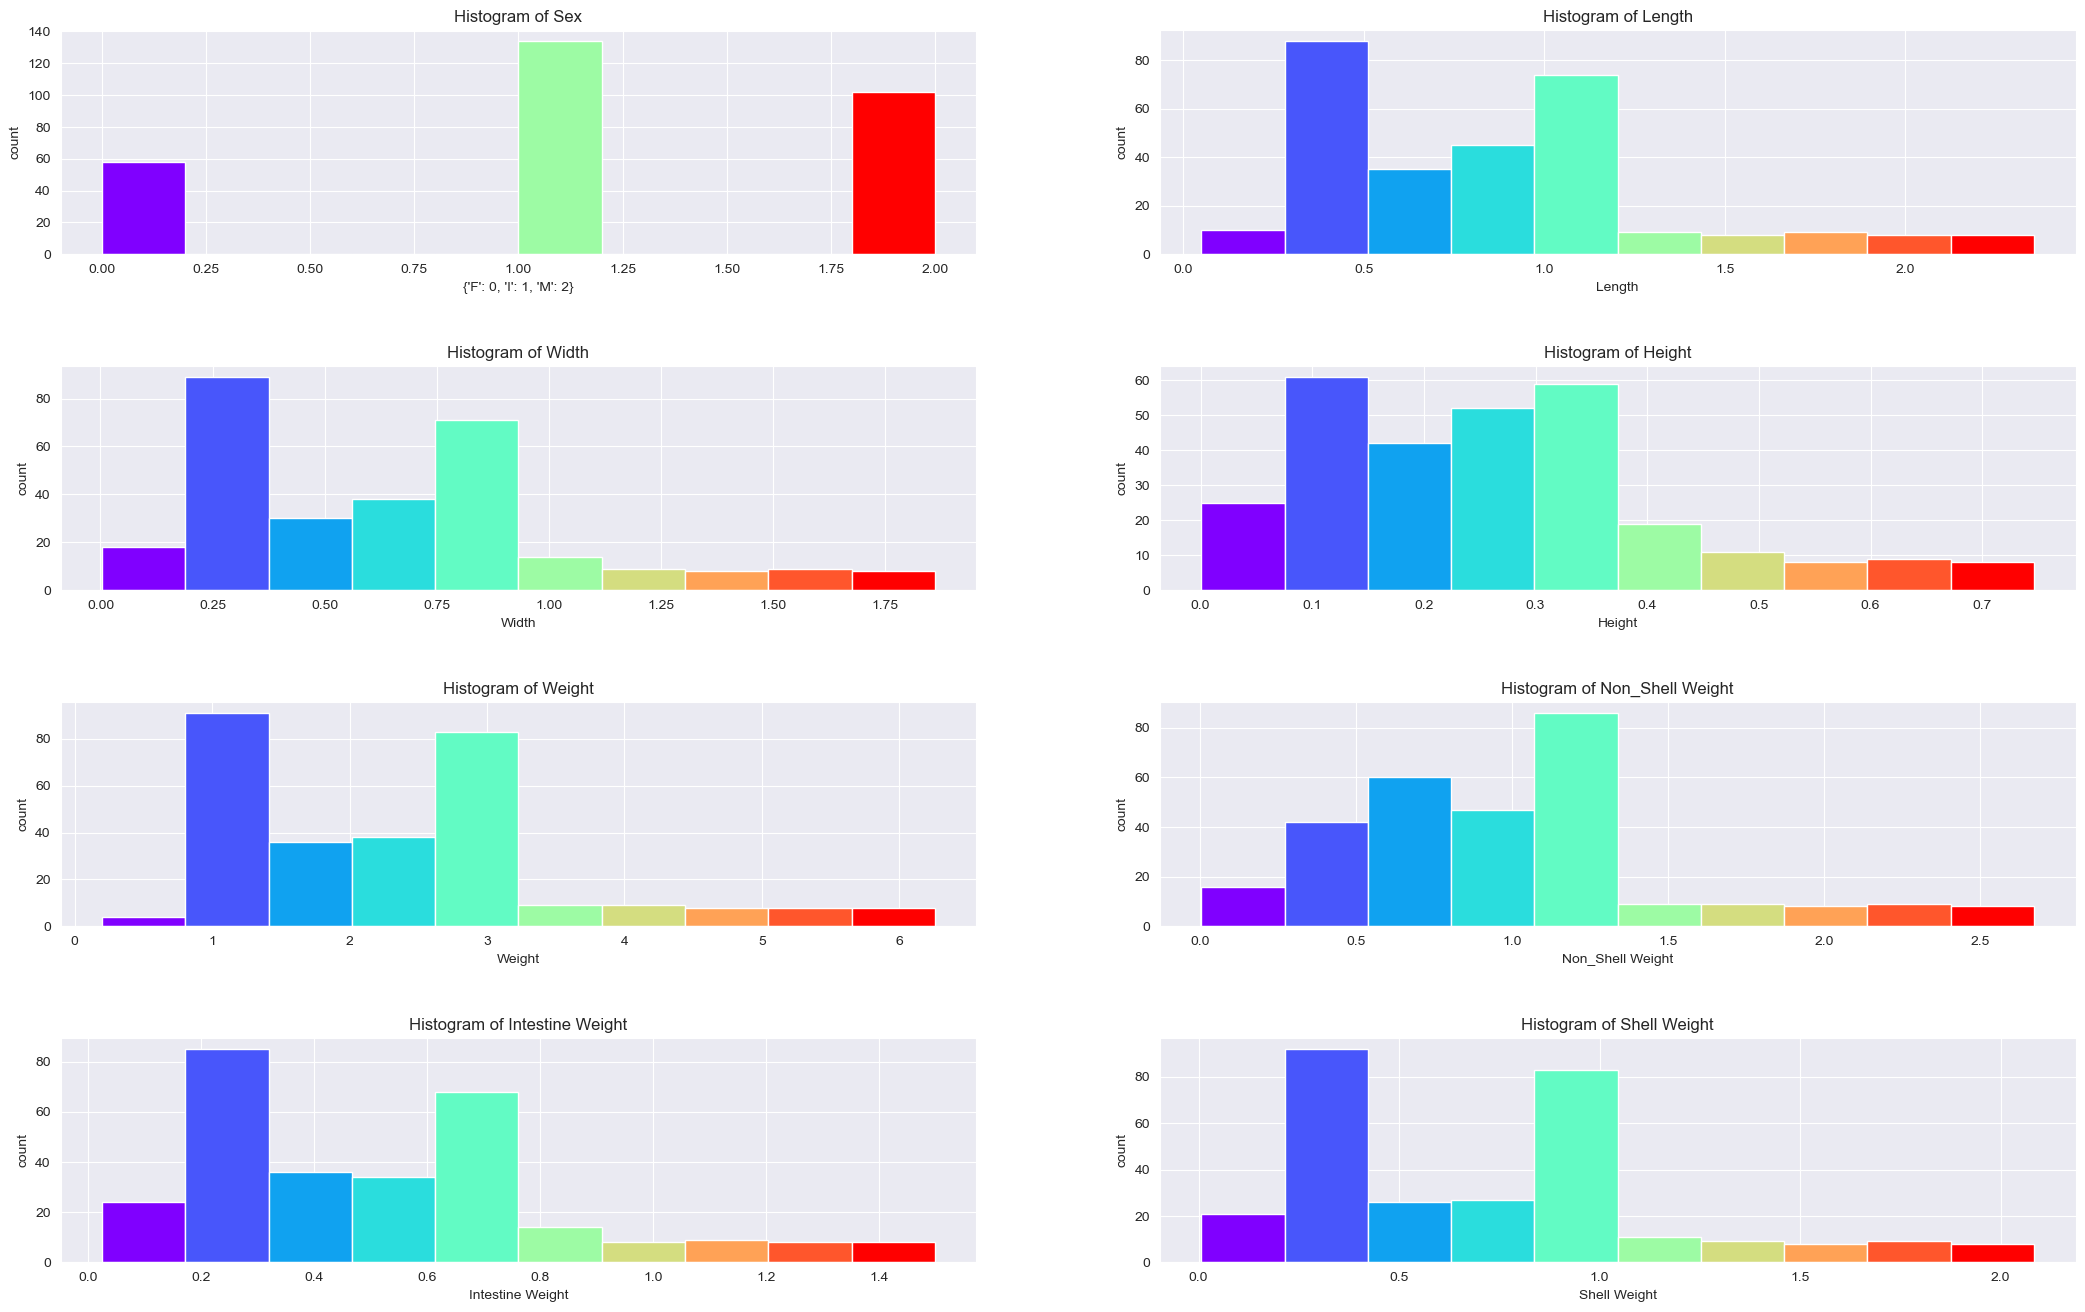

In [398]:
run_all_visualizations(request_df_w4, dataset_name='generated_data_week4')

In [399]:
# decode categorical data
request_df_w4['Sex'] = lable_encoder_sex.inverse_transform(request_df_w4['Sex'])
request_df_w4

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
0,M,0.569982,0.171209,0.098109,1.273115,0.025452,0.112388,0.108531
1,M,0.711411,0.207809,0.497150,1.194486,0.017124,0.087511,0.113913
2,I,0.615898,0.240639,0.089288,1.168776,0.016369,0.073469,0.068221
3,I,0.532696,0.076466,0.114445,1.217272,0.093375,0.112386,0.028513
4,I,0.392926,0.200906,0.067631,0.253973,0.034387,0.024892,0.006761
...,...,...,...,...,...,...,...,...
289,F,1.664508,1.314252,0.527151,4.421247,1.887695,1.058054,1.471478
290,M,2.262982,1.786792,0.716689,6.029060,2.566417,1.438478,2.000548
291,M,1.290461,1.018915,0.408690,3.433725,1.463494,0.820289,1.140809
292,I,1.888936,1.491455,0.598228,5.021427,2.142216,1.200713,1.669879


In [400]:
request_df_w4.to_csv('../data/generated_data_week4.csv', index=False)